## imports and load data

In [6]:
import matplotlib.pyplot as plt
import os
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm, combine_pvalues, wasserstein_distance_nd
import time
os.chdir("C:\\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts")
from BuildSampleObject import ProjectObject

# parameters
NUM_BINS = 20
NUM_PERMUTATIONS = 100
label_size = 15

In [10]:
# Step 1: Create the project
project_test = ProjectObject(main_folder='C://Users/Moshe/OneDrive/coding/SpatialGenomicsLab/SegmentedData/Organoids/organoids_not_filtered/', puncta_file_format='FOV1FOV_1.output.csv.withoutRF.csv.withCells.csv.enlarge.csv', auto_calc=False, xy_scaling=1/3.3, z_scaling=1/3.3)
for samp_name, samp_data in project_test.samples.items():
    print(samp_name)
    print("Num of cells", len(samp_data.cells))


C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_A1
Num of cells 1424
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_A2_left
Num of cells 1172
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_A2_right
Num of cells 554
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_A2_up
Num of cells 316
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_A3
Num of cells 906
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_C3_down_left
Num of cells 856
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_SegmentedData_Organoids_organoids_not_filtered_001iSTXBP1_C3_down_right
Num of cells 977
C:__Users_Moshe_OneDrive_coding_SpatialGenomicsLab_Segmented

In [2]:
# Step 1: Create the project
project = ProjectObject(main_folder='C://Users/Moshe/OneDrive/coding/SpatialGenomicsLab/SegmentedData/Organoids/filtered_organoids', xy_scaling=1/3.3, z_scaling=1/3.3)
for samp_name, samp_data in project.samples.items():
    # Change types by replacing 'type_0' with 'immature' and other types (1,2,3) with 'mature'. Also, delete cells of 'type_nan'
    samp_data.cells['cell_type'] = samp_data.cells['cell_type'].replace({'type_0': 'immature', 'type_1': 'mature', 'type_2': 'mature', 'type_3': 'mature'})
    samp_data.cells = samp_data.cells[samp_data.cells['cell_type'] != 'type_nan']


In [3]:
# general information
project.compute_sample_info()
project.sample_info

sample condition  num_cells  num_punctas    x_range  \
0              001STXBP1_A1      sick        133         4292  84.782516   
1         001STXBP1_A2_left      sick        172         5774  87.431774   
2        001STXBP1_A2_right      sick        101         3931  72.995861   
3           001STXBP1_A2_up      sick         98         3824  50.952301   
4              001STXBP1_A3      sick        165         5940  54.271176   
5    001STXBP1_C3_down_left      sick        224         8428  92.003524   
6   001STXBP1_C3_down_right      sick        259         9969  90.132066   
7          001STXBP1_C3_top      sick        290        10922  97.000505   
8         001STXBP1_C4_left      sick        301        10224  98.108152   
9        001STXBP1_C4_right      sick        306        11326  96.561945   
10           002CTR_B1_left   control        519        24675  94.249067   
11          002CTR_B1_right   control        154         5017  96.111017   
12             002CTR_B1_up   control        306        12524  86.399468   
13                002CTR_D3   control        219         8054  95.713983   
14                002CTR_D4   control        569        37372  80.903039   
15     002CTR_D5_twins_left   control        276        10452  94.284592   
16    002CTR_D5_twins_right   control        297        10221  93.167714   

      y_range     z_range  num_genes          cell_types  
0   93.127718   68.231591         62  [immature, mature]  
1   81.515085   74.279107         62  [immature, mature]  
2   69.375737   47.865954         62  [mature, immature]  
3   57.609600   39.692356         62  [mature, immature]  
4   82.003528   63.432822         62  [immature, mature]  
5   79.547977   51.869378         62  [immature, mature]  
6   92.448790   48.410972         62  [mature, immature]  
7   88.283731   61.468511         62  [immature, mature]  
8   92.371307   76.525706         62  [mature, immature]  
9   98.146607   76.927788         62  [immature, mature]  
10  95.622939   86.912201         62  [mature, immature]  
11  93.637649   69.587145         62  [mature, immature]  
12  93.733845   72.711670         62  [mature, immature]  
13  94.666425   59.366026         62  [mature, immature]  
14  96.100974   67.972856         62  [mature, immature]  
15  91.928084  104.385334         62  [mature, immature]  
16  90.796637  119.795274         62  [immature, mature]

In [4]:
# ROBO Moran's i
MI_df = pd.read_csv(os.path.join(project.path, "comparing_conditions_Moran_I.csv"), index_col=0).T
MI_df['sample'] = MI_df.index
robo_mi_df = MI_df[['sample', 'ROBO1']]
robo_mi_df


Gene                                                  sample     ROBO1
001STXBP1_A1_cond1                        001STXBP1_A1_cond1   0.09673
001STXBP1_A2_left_cond1              001STXBP1_A2_left_cond1  0.016528
001STXBP1_A2_right_cond1            001STXBP1_A2_right_cond1  0.046789
001STXBP1_A2_up_cond1                  001STXBP1_A2_up_cond1   0.16963
001STXBP1_A3_cond1                        001STXBP1_A3_cond1  0.001268
001STXBP1_C3_down_left_cond1    001STXBP1_C3_down_left_cond1  0.044891
001STXBP1_C3_down_right_cond1  001STXBP1_C3_down_right_cond1  0.088772
001STXBP1_C3_top_cond1                001STXBP1_C3_top_cond1  0.130844
001STXBP1_C4_left_cond1              001STXBP1_C4_left_cond1  0.322098
001STXBP1_C4_right_cond1            001STXBP1_C4_right_cond1  0.123705
002CTR_B1_left_cond2                    002CTR_B1_left_cond2  0.037791
002CTR_B1_right_cond2                  002CTR_B1_right_cond2 -0.015385
002CTR_B1_up_cond2                        002CTR_B1_up_cond2  0.028108
002CTR_D3_cond2                              002CTR_D3_cond2  0.059635
002CTR_D4_cond2                              002CTR_D4_cond2  0.160784
002CTR_D5_twins_left_cond2        002CTR_D5_twins_left_cond2  0.038311
002CTR_D5_twins_right_cond2      002CTR_D5_twins_right_cond2  0.213104
p_value                                              p_value     0.532
q_value (FDR threshold)              q_value (FDR threshold)   0.93496
bigger                                                bigger     cond1

Slope of the mean line: -0.001919309989016328


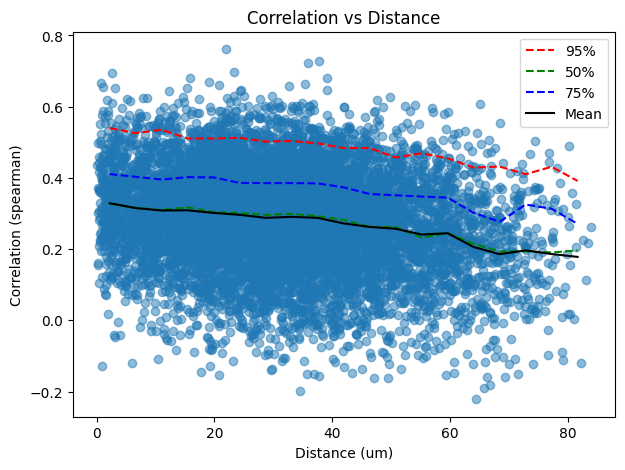

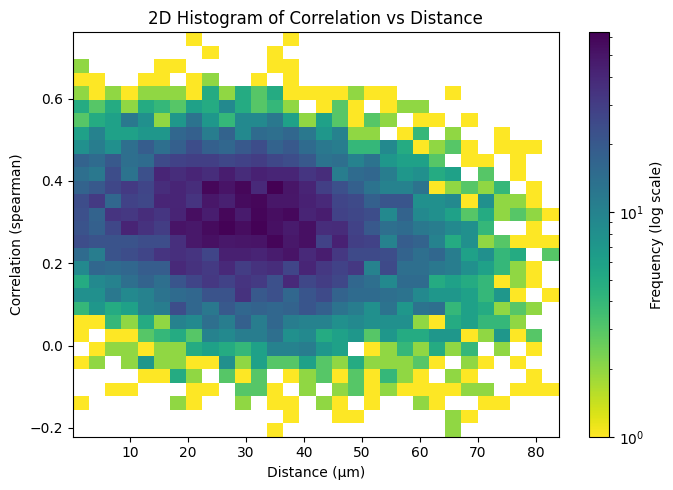

Slope of the mean line: -0.002075664485831973


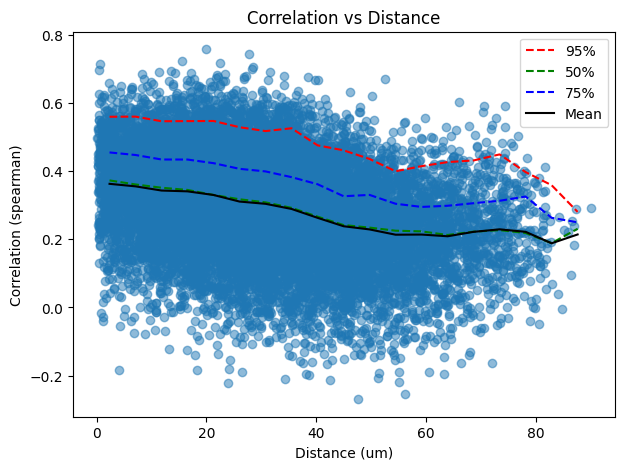

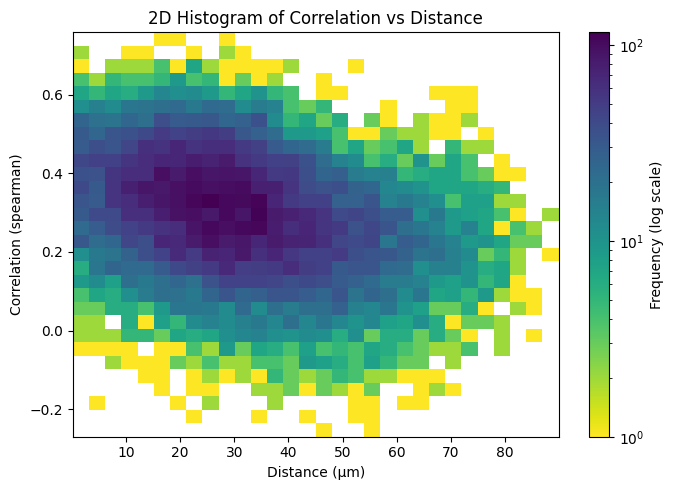

Slope of the mean line: -0.002067033988197191


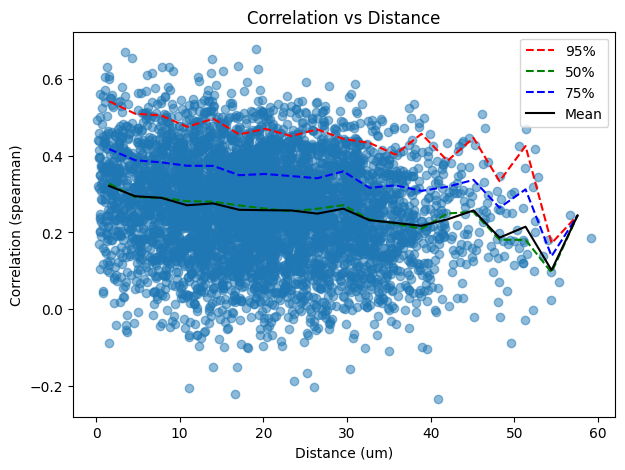

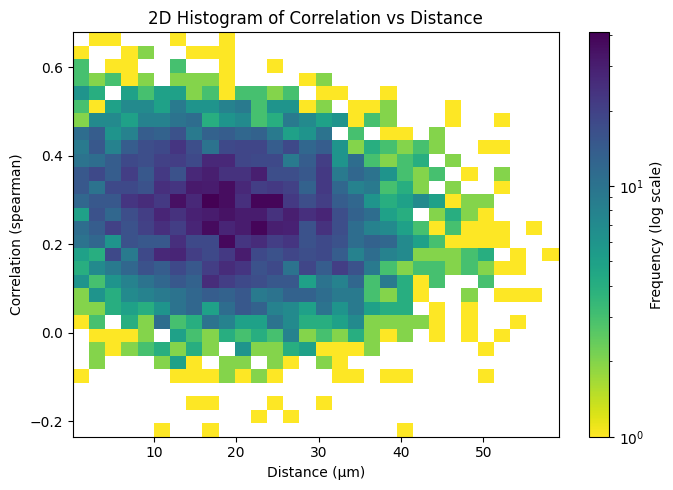

Slope of the mean line: -0.0017741678715534135


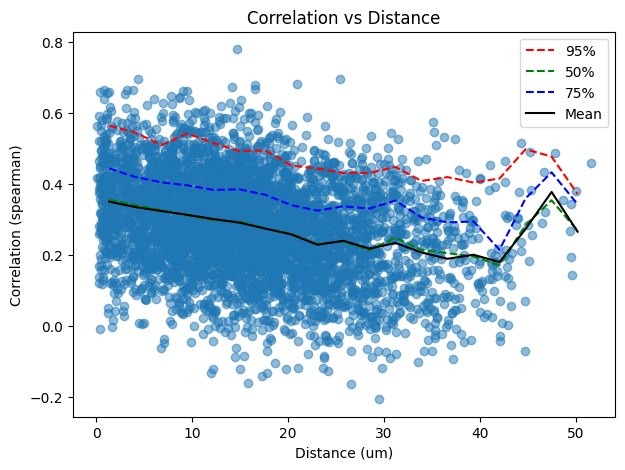

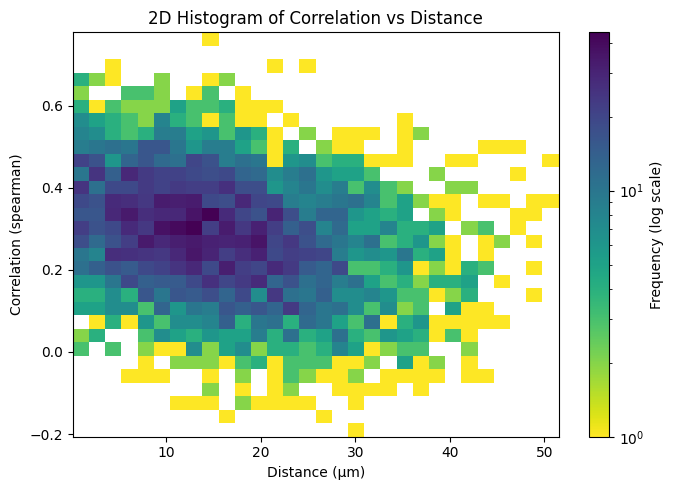

Slope of the mean line: -0.004627126092195742


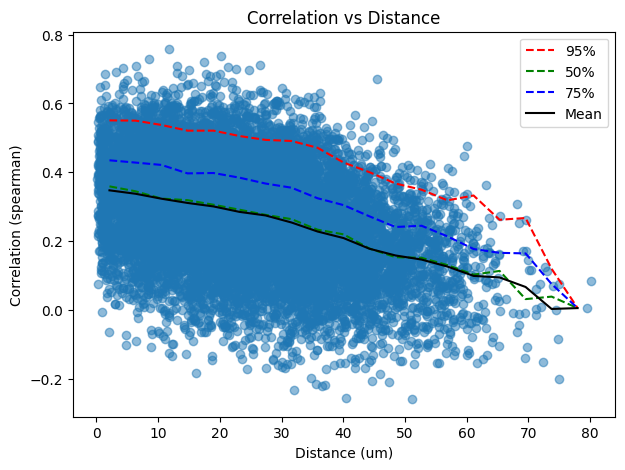

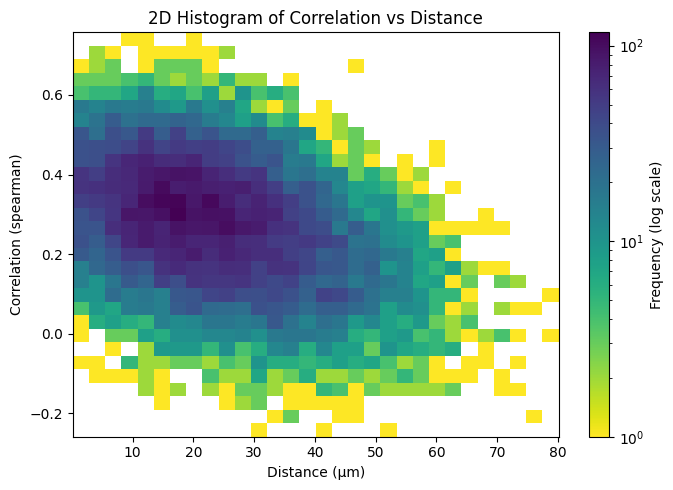

Slope of the mean line: -0.00035085212386162643


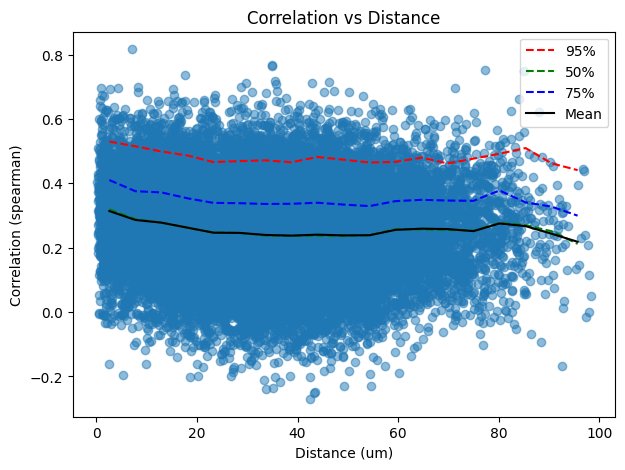

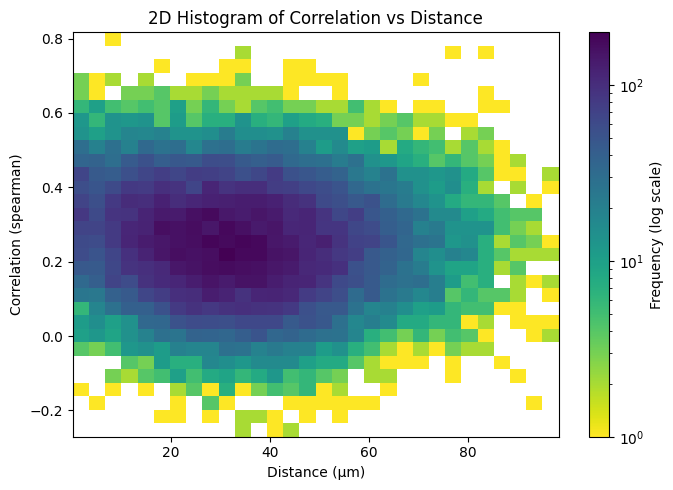

Slope of the mean line: -0.00024277277945583921


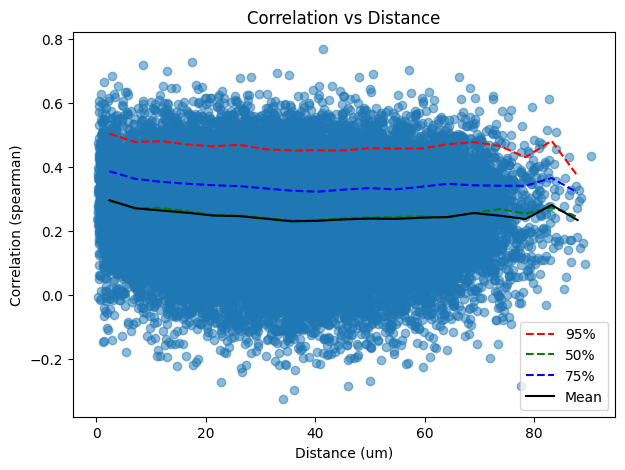

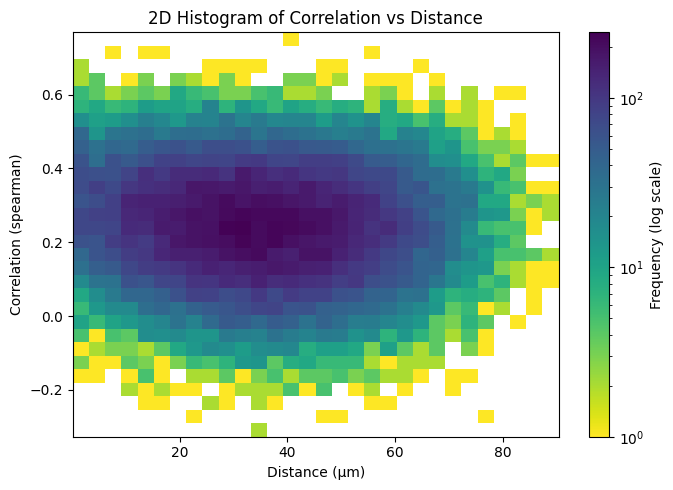

Slope of the mean line: -0.00061482573833057


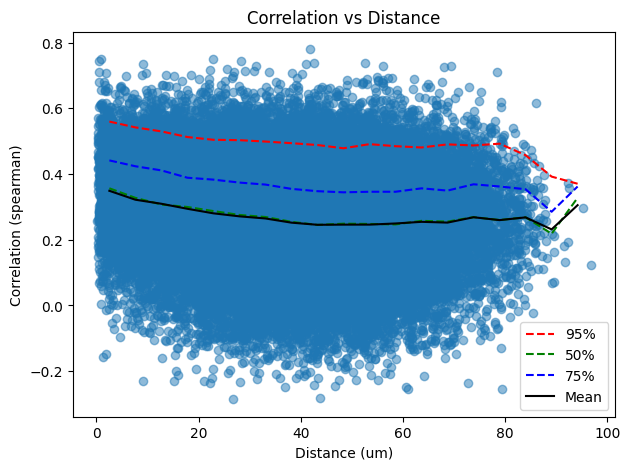

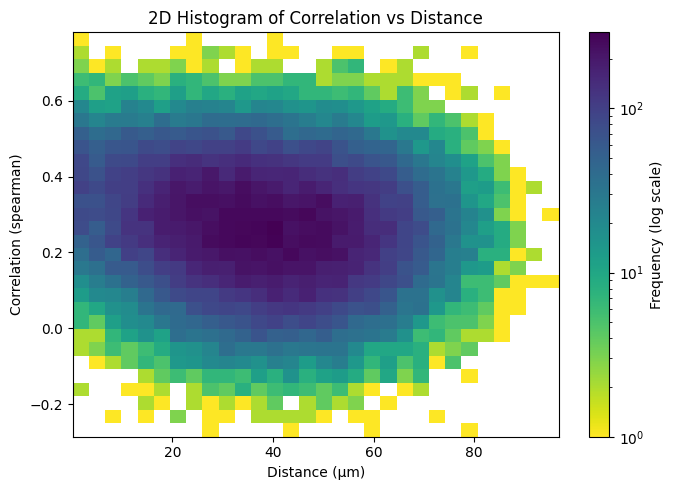

Slope of the mean line: -0.0012917467156663713


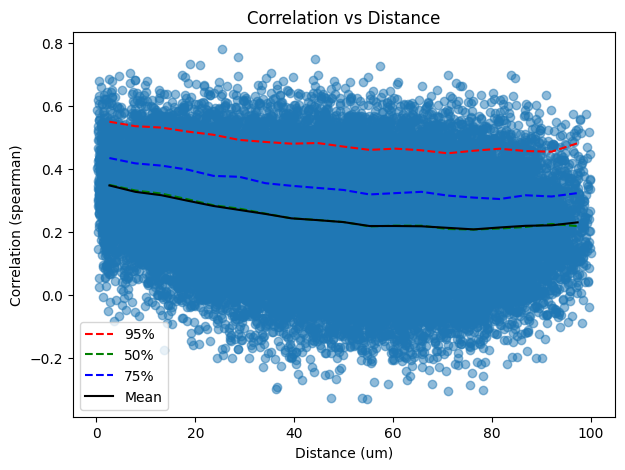

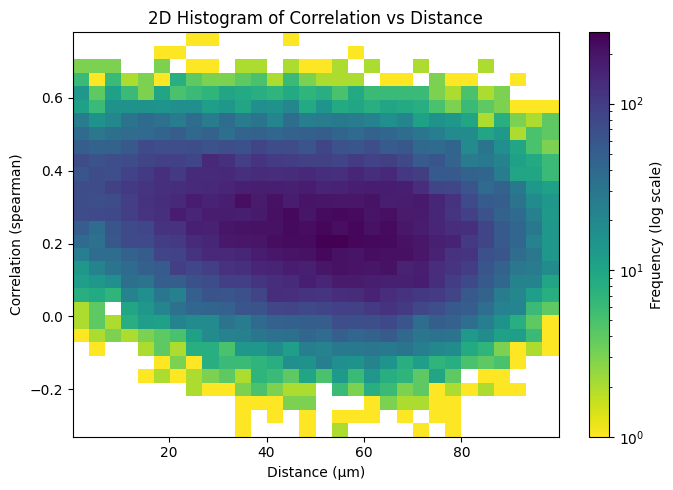

Slope of the mean line: -0.0004897374449307924


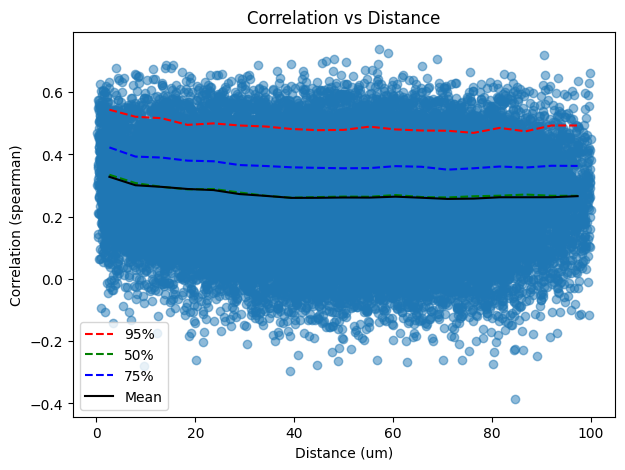

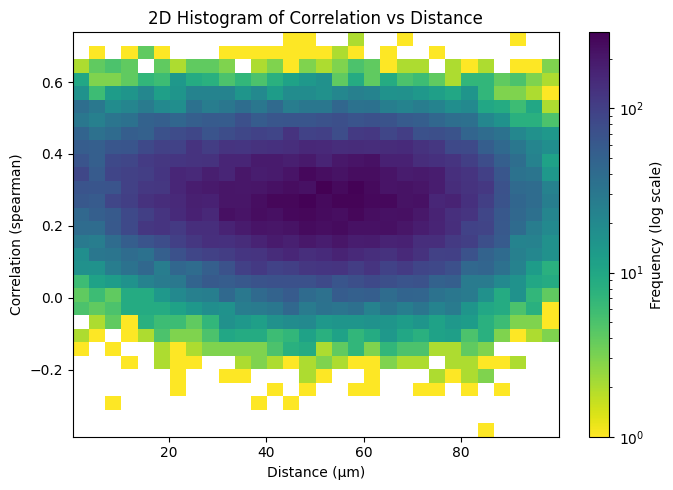

Slope of the mean line: -0.001175842422948422


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


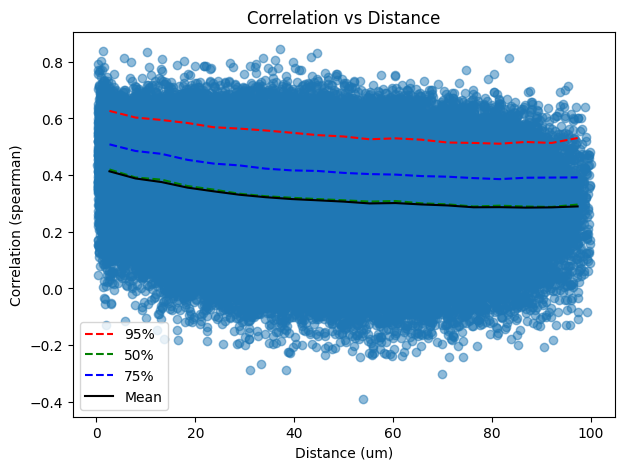

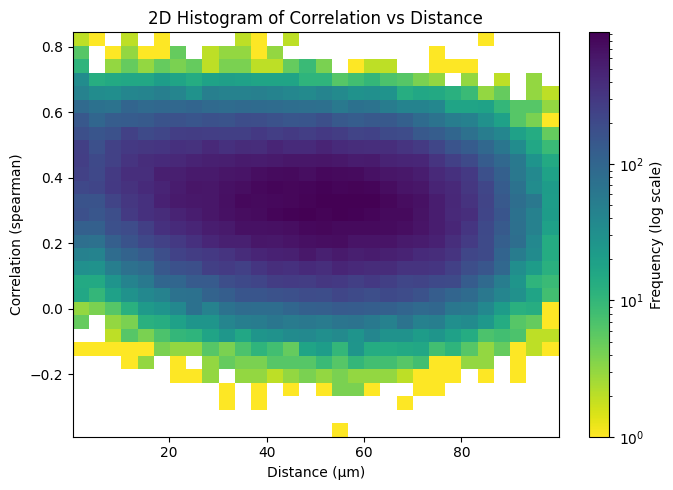

Slope of the mean line: -0.0008537776754564382


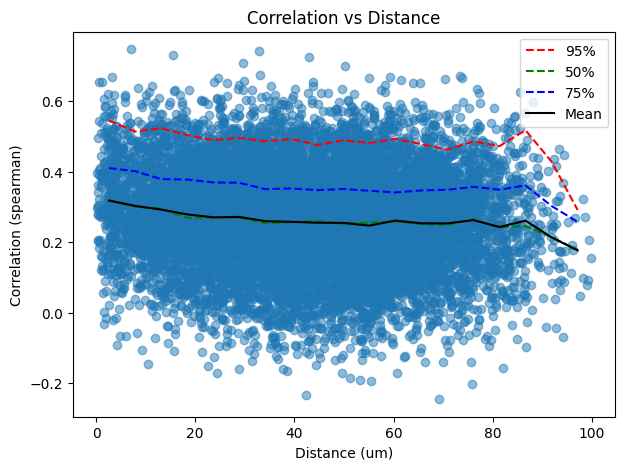

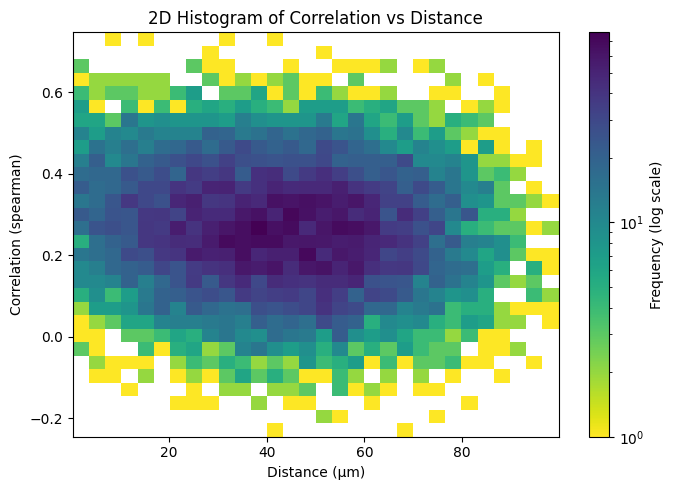

Slope of the mean line: -0.000854244811458859


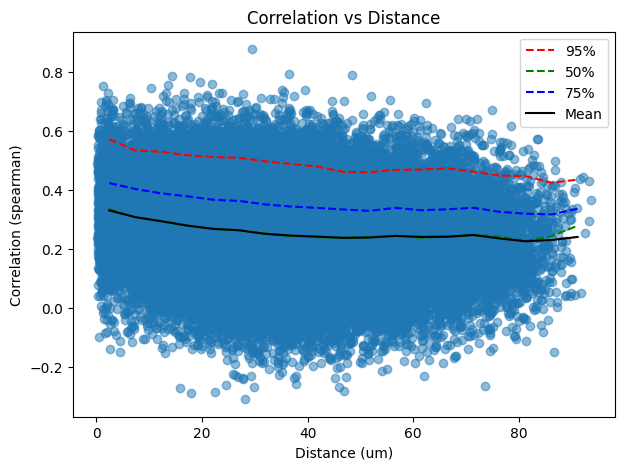

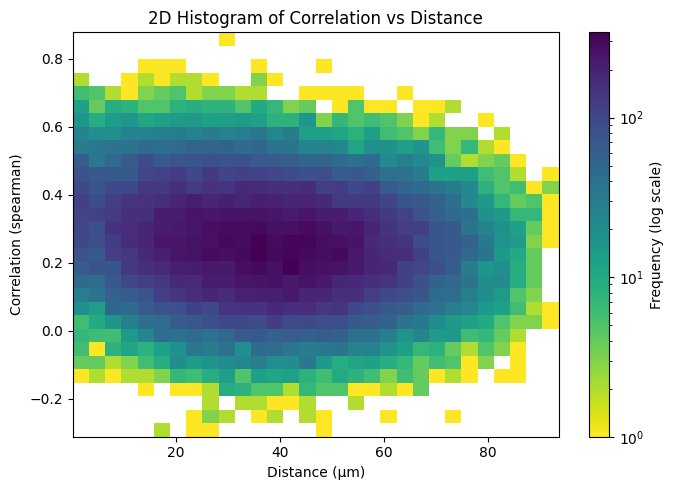

Slope of the mean line: -0.0006437073138347376


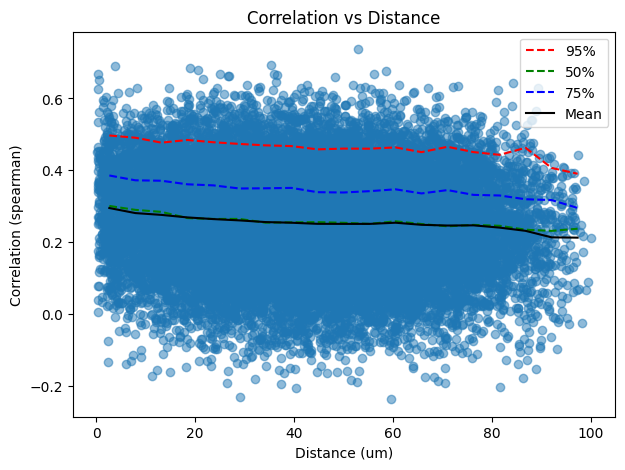

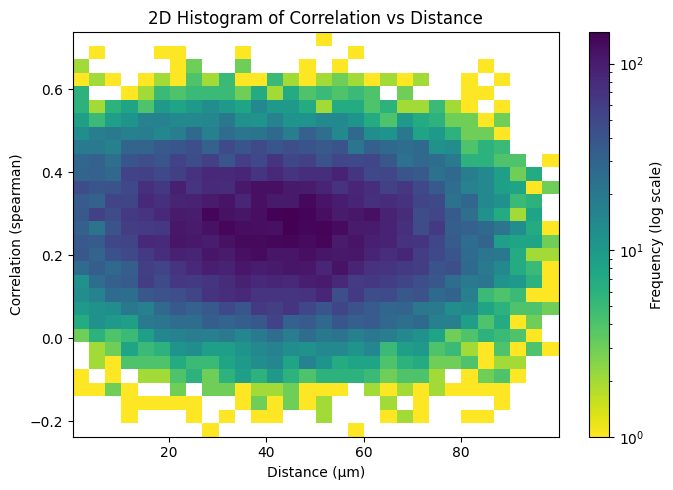

Slope of the mean line: -0.0012546085533285253


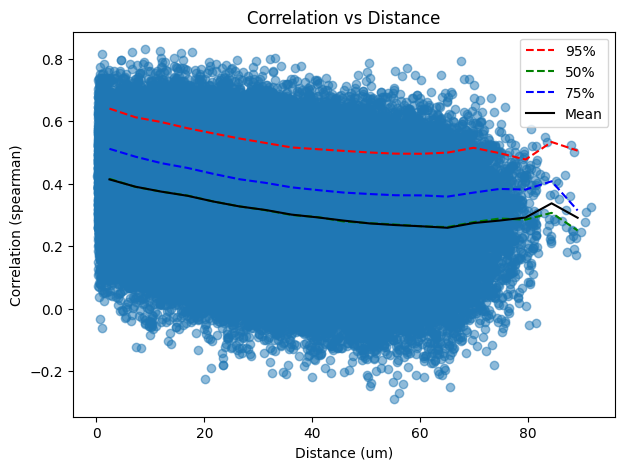

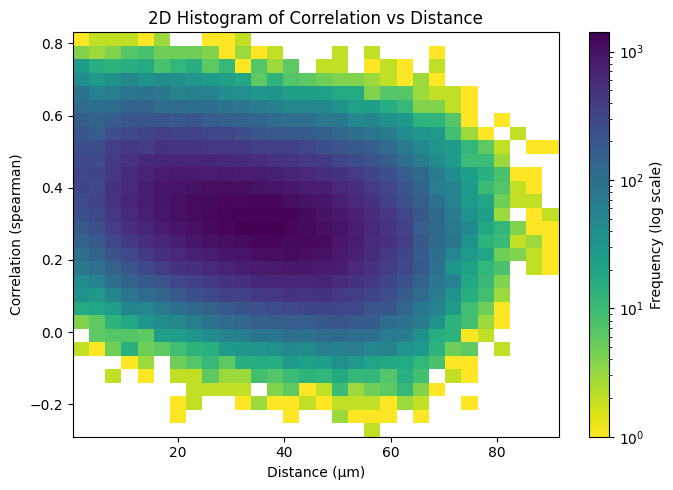

Slope of the mean line: -0.0016153022532897745


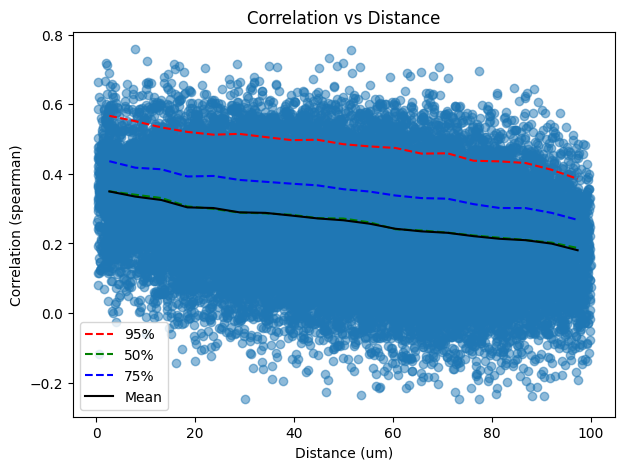

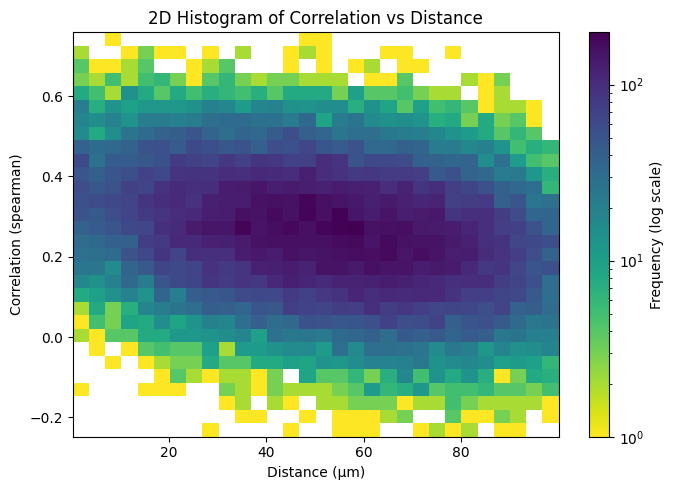

Slope of the mean line: -0.0018060230121468412


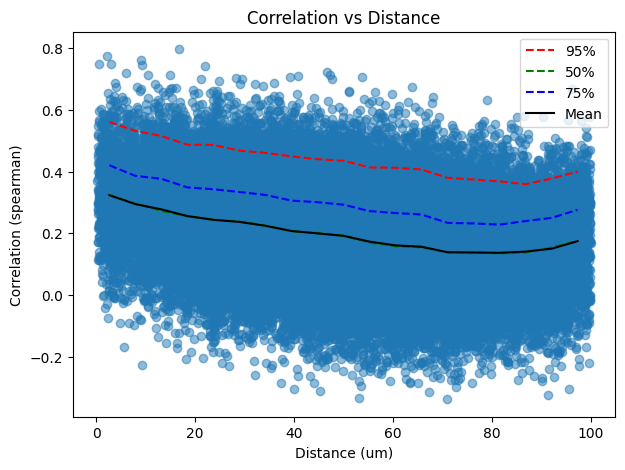

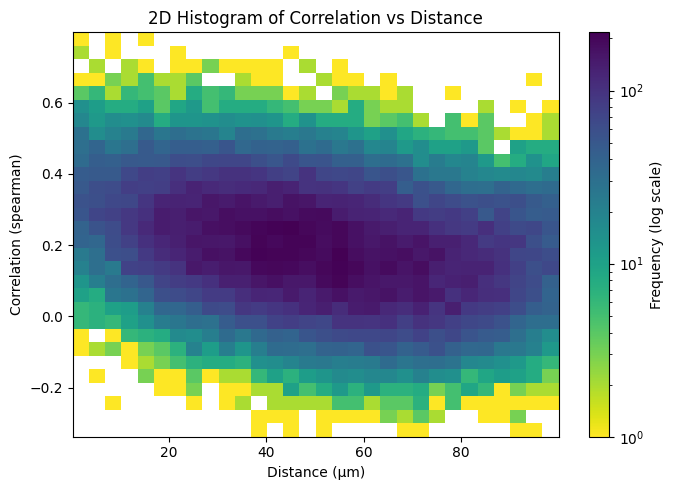

In [13]:
for samp_name, samp_data in project.samples.items():
    samp_data.plot_correlation_vs_distance(method='spearman')

## graph of cell types proportions

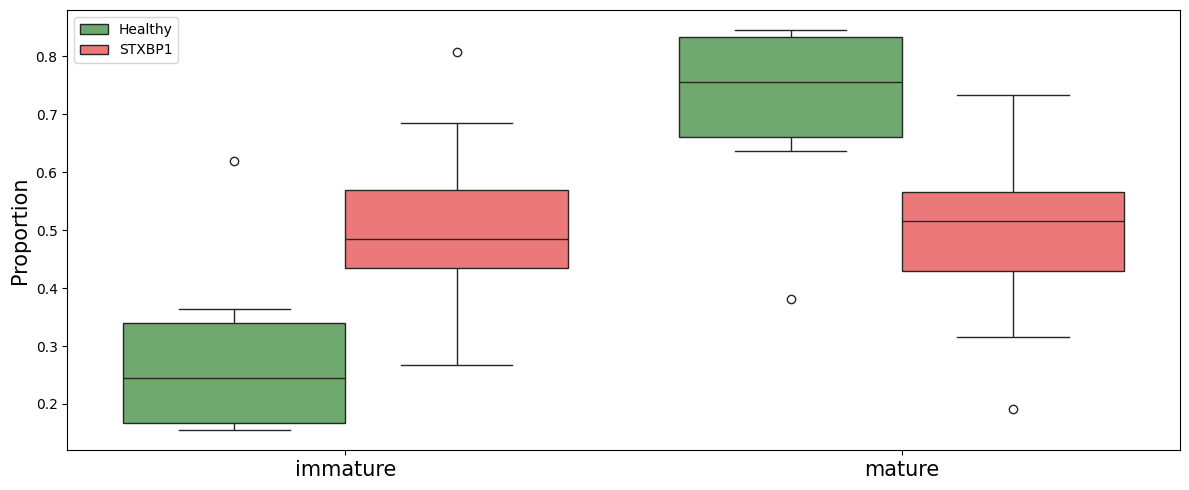

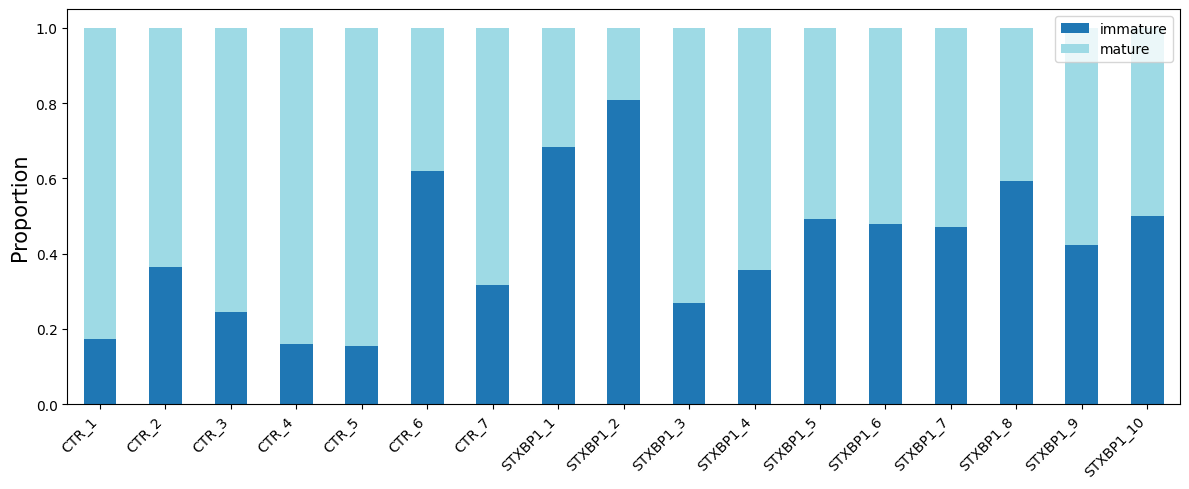

  cell_type  mannwhitney_p  perm_p  control_mean  sick_mean
0  immature       0.018511   0.014      0.290383   0.507148
1    mature       0.018511   0.026      0.709617   0.492852


In [5]:
# Step 2: Run count types analysis
df_counts, df_stats, (fig1, fig3) = project.analyze_cell_type_population(mode='relative', n_permutations=1000, x_label_size=label_size, y_label_size=label_size)

# Step 3: Show the plots
plt.show()

# Step 4: Optionally display the stats
print(df_stats)


## graph of cell types count

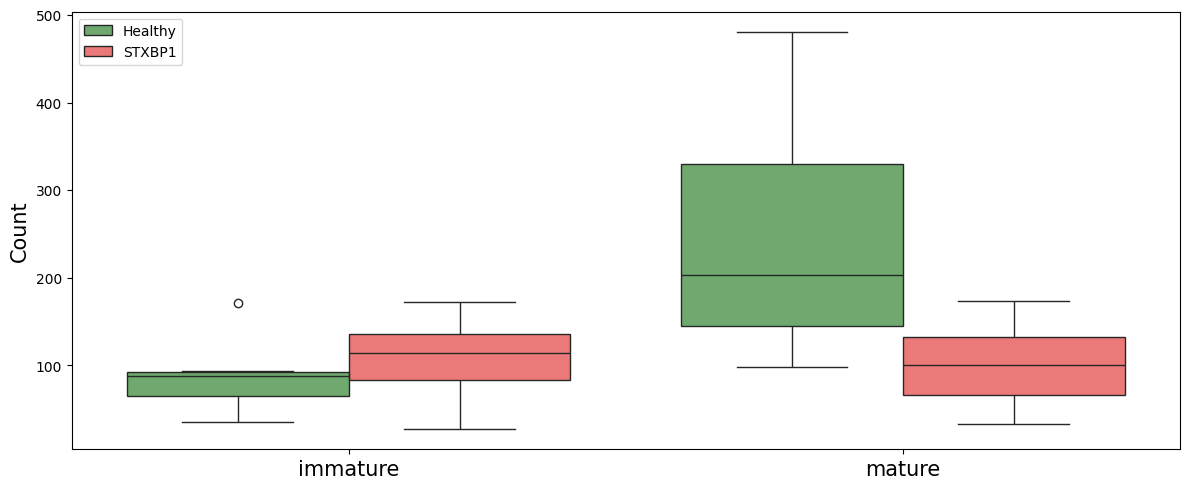

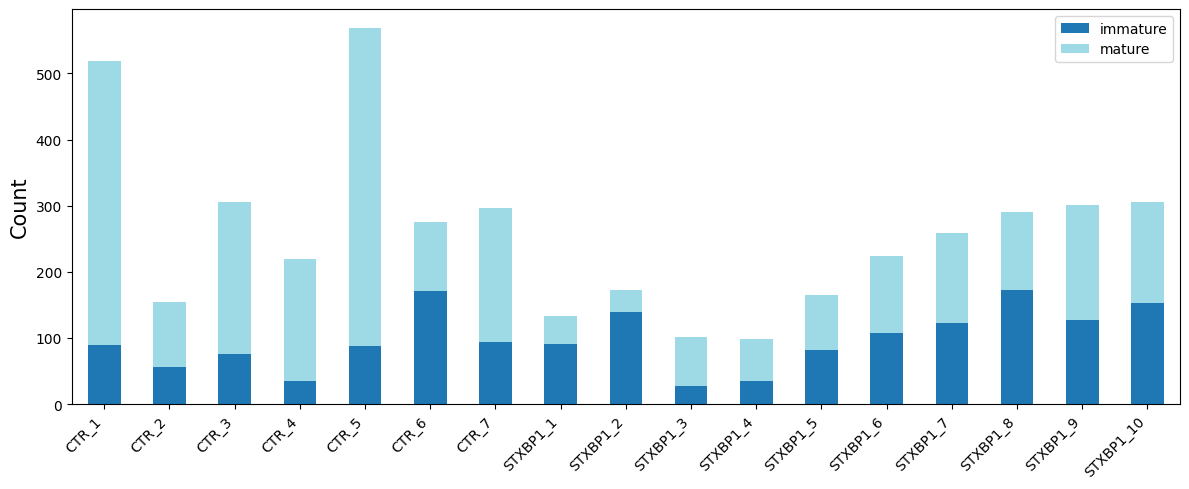

  cell_type  mannwhitney_p  perm_p  control_mean  sick_mean
0  immature       0.328817   0.416     87.000000      105.4
1    mature       0.013575   0.003    247.285714       99.5


In [6]:
# Step 2: Run count types analysis
df_counts, df_stats, (fig1, fig3) = project.analyze_cell_type_population(mode='absolute', n_permutations=1000, x_label_size=label_size, y_label_size=label_size)

# Step 3: Show the plots
plt.show()

# Step 4: Optionally display the stats
print(df_stats)


## define functions for distribution along axis

In [7]:

def get_cumulative_distribution(data, cell_type):
    """
    Calculate the average cumulative distribution function (CDF) for a specific type across multiple samples.
    """
    cumulative_distributions = []

    for sample_name, df in data.items():
        signal = df[cell_type]
        cumulative = np.cumsum(signal) / np.sum(signal)
        cumulative_distributions.append(cumulative)

    mean_cumulative_distribution = np.mean(cumulative_distributions, axis=0)
    return mean_cumulative_distribution

def get_mean_hist(data, cell_type):

    signals = []
    for sample_name, df in data.items():
        sig = df[cell_type]
        signals.append(sig)
    # assume the signals are histograms values 
    mean_hist = np.mean(signals, axis=0)
    return mean_hist

def compute_ks_statistic(sick_data, control_data, cell_type, print_p=False):
    """
    Compute the Kolmogorov-Smirnov (KS) statistic for two groups (sick and control).
    """
    sick_cdf = get_cumulative_distribution(sick_data, cell_type)
    control_cdf = get_cumulative_distribution(control_data, cell_type)
    sick_hist = get_mean_hist(sick_data, cell_type)
    control_hist = get_mean_hist(control_data, cell_type)
    ks_statistic = np.max(np.abs(sick_cdf - control_cdf))
    if print_p:
        _, p_val = ks_2samp(sick_hist, control_hist)
        print("ks pval:", p_val)

    return ks_statistic, sick_cdf, control_cdf, sick_hist, control_hist
    

def plot_cumulative_distributions(sick_cdf, control_cdf, ks_statistic, bin_edges = NUM_BINS, cell_type = None, var_name=None):
    """
    Plot cumulative distributions for sick and control groups, highlighting the KS statistic.
    """
    if bin_edges == None:
        bin_edges = 50
    if np.isscalar(bin_edges):
        bin_edges = np.linspace(0, 1, bin_edges + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, sick_cdf, color="red")
    plt.plot(bin_centers, control_cdf, color="green")

    # Highlight the KS statistic
    max_diff_index = np.argmax(np.abs(sick_cdf - control_cdf))
    max_diff = sick_cdf[max_diff_index] - control_cdf[max_diff_index]
    plt.vlines(bin_centers[max_diff_index], control_cdf[max_diff_index], sick_cdf[max_diff_index], color="black", linestyle="--")
    print(f"KS Statistic: {ks_statistic:.3f}")
    plt.title(cell_type)

    plt.xlabel("Normalized 3D distance")
    plt.ylabel("Cumulative Probability")
    plt.show()


def plot_histograms(sick_hist, control_hist, title=None):

    # Plot the 2 histograms on the same graph
    n_points = len(sick_hist)
    
    bin_edges = np.linspace(0, 1, n_points + 1) 
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=control_hist, alpha=0.5, label='Healthy', color='green')
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=sick_hist, alpha=0.5, label='STXBP1', color='red')
    plt.xlabel("Normalized 3D distance")
    plt.ylabel("Normalized distribution")
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()
    
    
# def get_pdf
#     """
#     Calculate the average probability density function (PDF) for a specific type across multiple samples.
#     """
#     pdfs = []

#     for sample_name, df in data.items():
#         signal = df[cell_type]
#         # scale power s.t. the integral over probabilities will be 1
#         signal = signal * len(signal)
#         pdfs.append(signal)

#     mean_pdf = np.mean(pdfs, axis=0)
#     # senity check
#     point_step = 1 / (len(signal))
#     print(f"integral over pdf is approximately {np.sum(signal) * point_step}")
#     return mean_pdf
    
# def plot_pdf(sick_pdf, control_pdf, bin_edges = None, cell_type = None, var_name='Z axis'):
#     """
#     Plot probability density functions for sick and control groups
#     """

#     if bin_edges == None:
#         bin_edges = 50
#     if np.isscalar(bin_edges):
#         bin_edges = np.linspace(0, 1, bin_edges + 1)    
#     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#     plt.plot(bin_centers, sick_pdf, label="Sick PDF", color="blue")
#     plt.plot(bin_centers, control_pdf, label="Control PDF", color="green")
#     plt.xlabel(var_name)
#     plt.ylabel("Probability Density")
#     plt.title(f"PDFs of type {cell_type} along {var_name}")
#     plt.legend()
#     plt.show()

In [8]:
def permutation_test(sick_data, control_data, cell_type, bin_edges=NUM_BINS, n_permutations=NUM_PERMUTATIONS, plot_data_cdfs=False, plot_permutation_dist=False, var_name = 'Z axis', seed=1):
    """
    Conduct a permutation test for the KS statistic.
    """
    # Set seed
    np.random.seed(seed)
    
    # Compute observed KS statistic
    observed_statistic, sick_cdf, control_cdf, sick_hist, control_hist = compute_ks_statistic(sick_data, control_data, cell_type, print_p=True)

    # Combine all data
    all_data = {**sick_data, **control_data}
    all_sample_names = list(all_data.keys())
    n_sick = len(sick_data)

    permuted_stats = []
    for _ in range(n_permutations):
        np.random.shuffle(all_sample_names)
        permuted_sick = {name: all_data[name] for name in all_sample_names[:n_sick]}
        permuted_control = {name: all_data[name] for name in all_sample_names[n_sick:]}

        permuted_statistic, _, _, _, _ = compute_ks_statistic(permuted_sick, permuted_control, cell_type)
        permuted_stats.append(permuted_statistic)

    # Calculate p-value assuming normal distribution of permuted statistics
    mean_stat = np.mean(permuted_stats)
    std_stat = np.std(permuted_stats)
    z_p_value = 1 - norm.cdf(observed_statistic, loc=mean_stat, scale=std_stat)
    direct_p_value = sum(permuted_stats>=observed_statistic)/(1+n_permutations)
 
    if plot_data_cdfs:
        plot_cumulative_distributions(sick_cdf, control_cdf, observed_statistic, bin_edges, cell_type, var_name)
        plot_histograms(sick_hist, control_hist, title=cell_type)
        
    if plot_permutation_dist:
        # Plot histogram of permuted statistics 
        plt.hist(permuted_stats, bins=30, alpha=0.6, color="gray")
        
        # Print observed statistic
        plt.axvline(observed_statistic, color="red", linestyle="--")
        print(f"For type {cell_type} with {n_permutations} permutations, we got direct_p-value of: {direct_p_value:.3e}")
        
        plt.xlabel("KS Statistic")
        plt.ylabel("Counts")
        plt.title(f"Permutation Test of KS-statistic for type {cell_type}")
        plt.show()

    return observed_statistic, z_p_value, direct_p_value, 

## Types distribution along r axis - spherical

### graph for each sample

C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomic

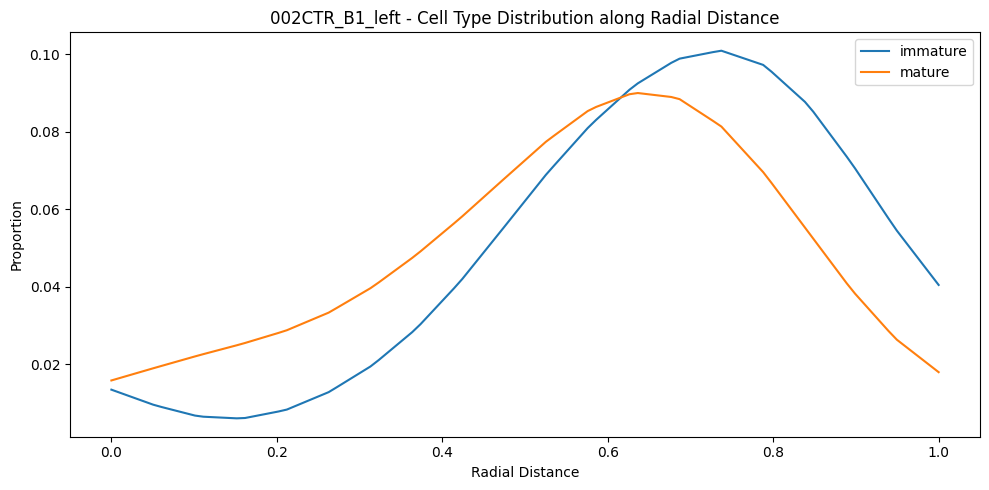

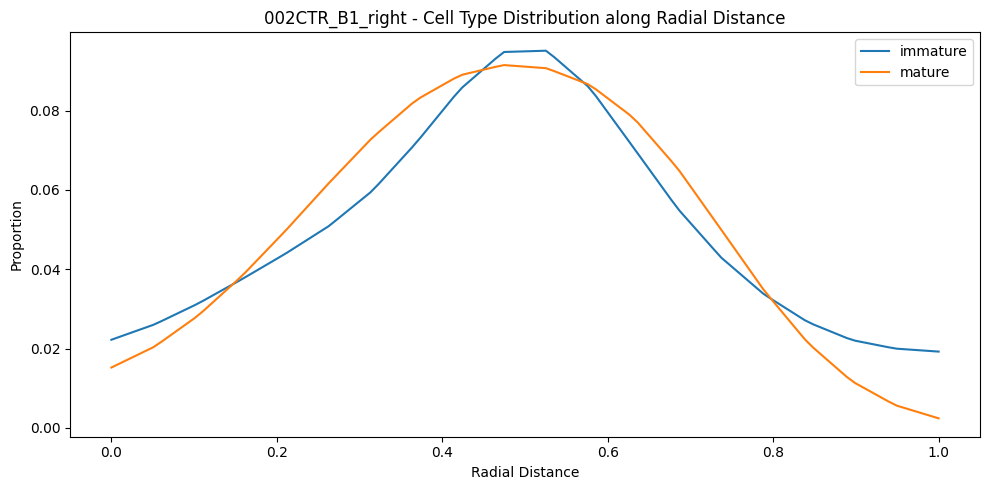

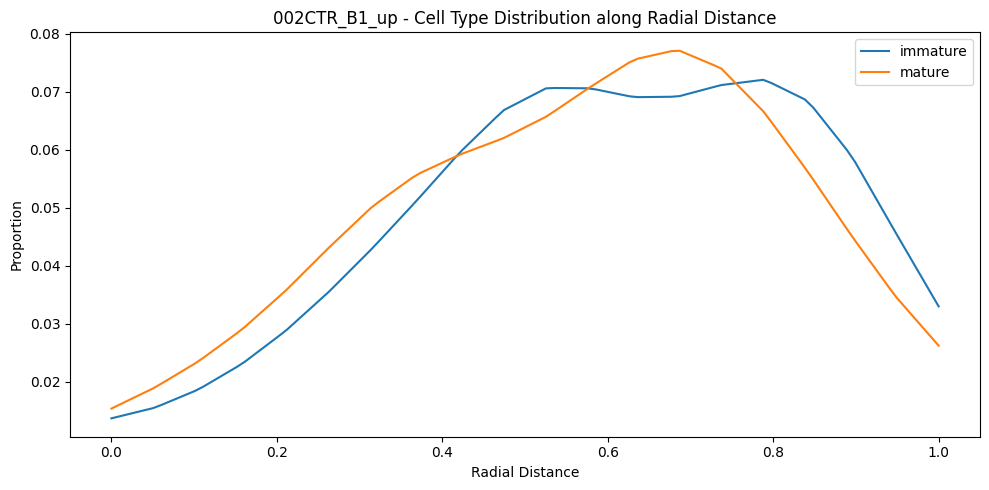

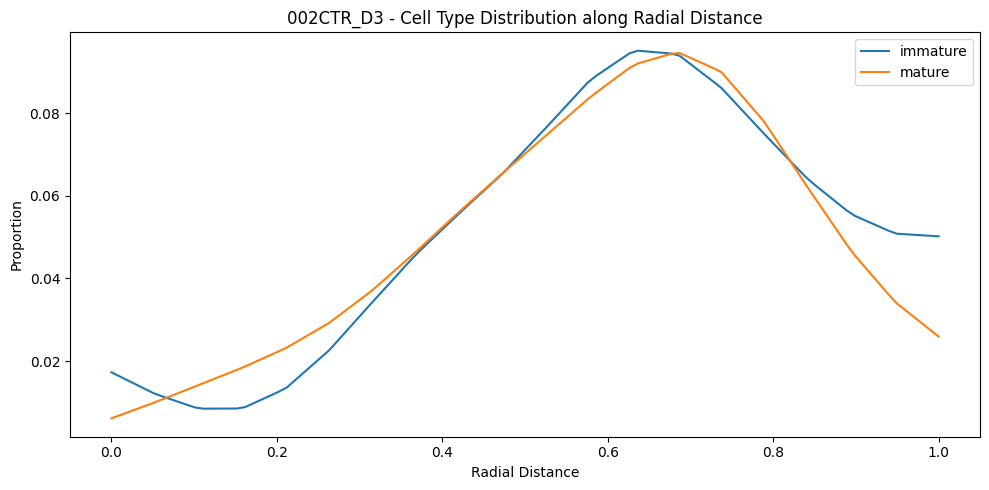

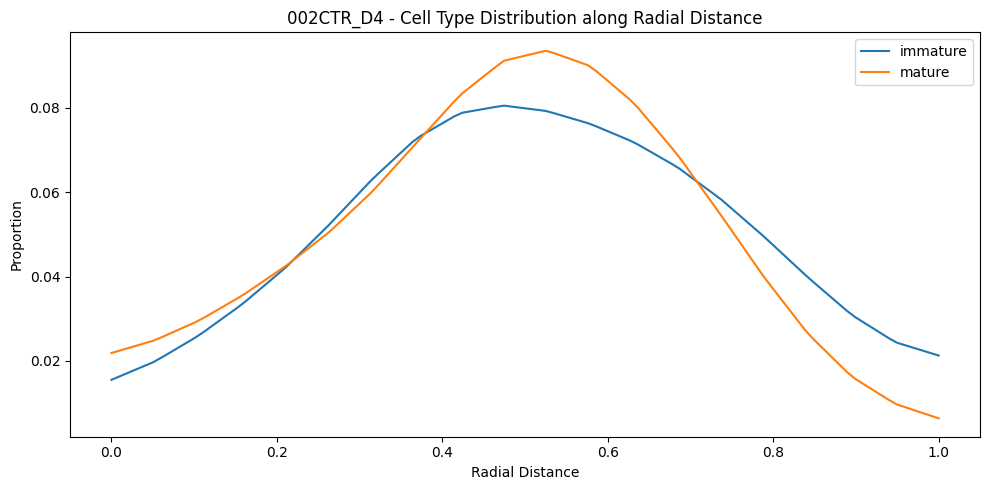

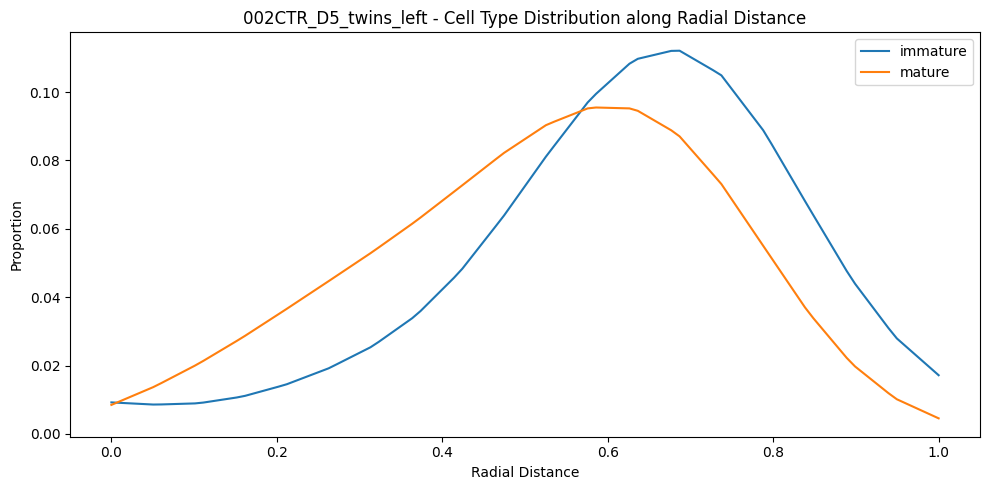

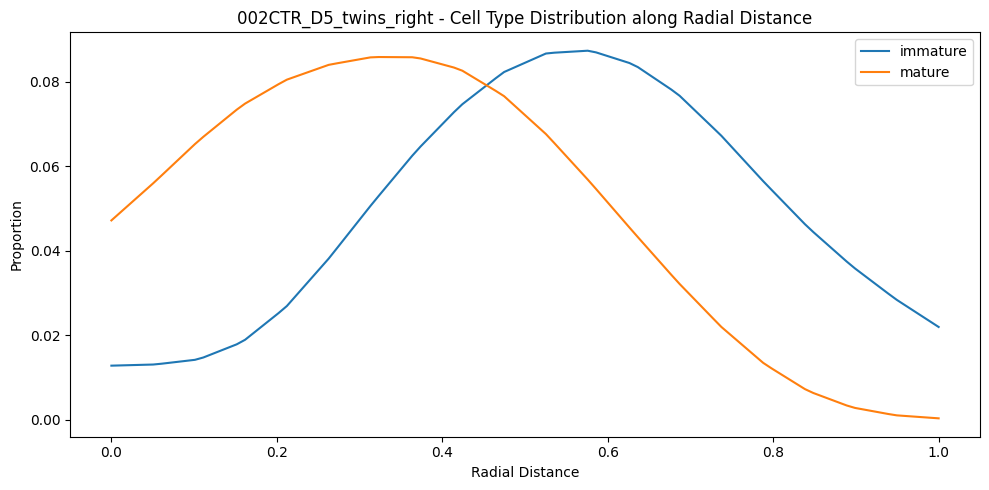

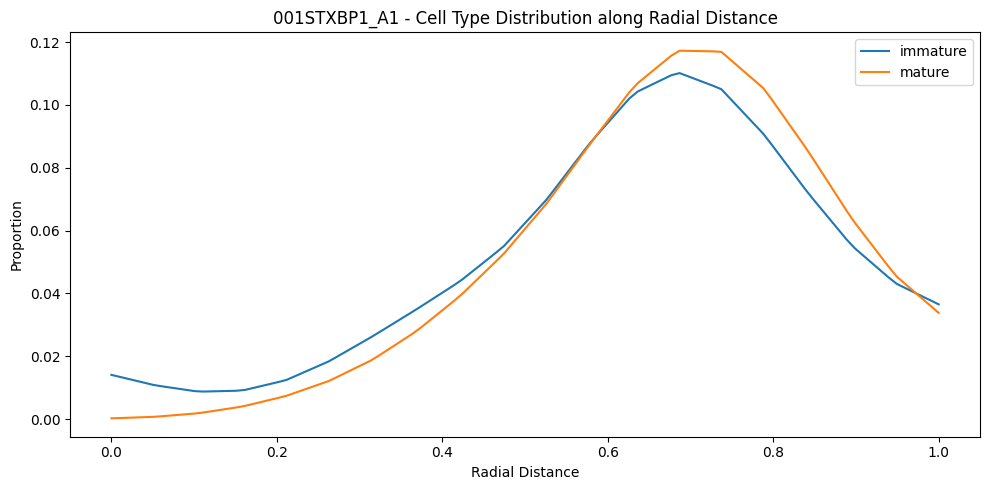

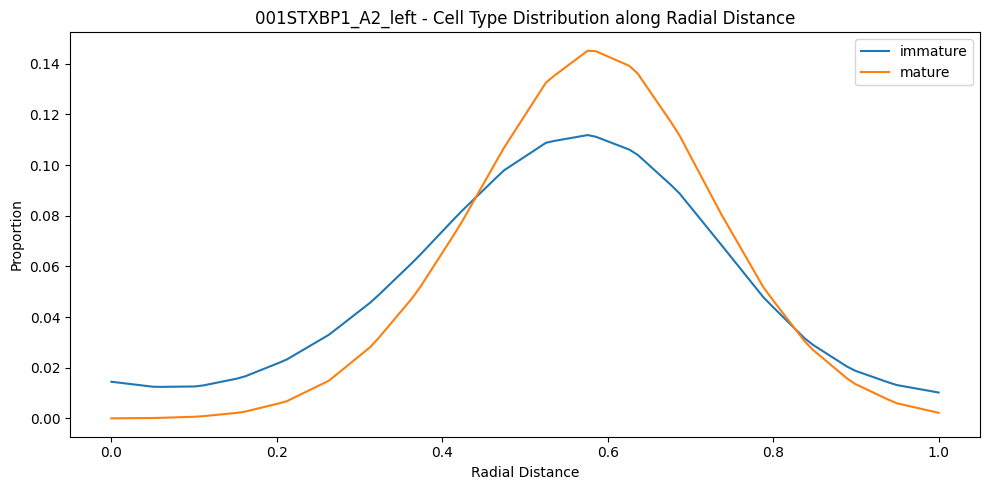

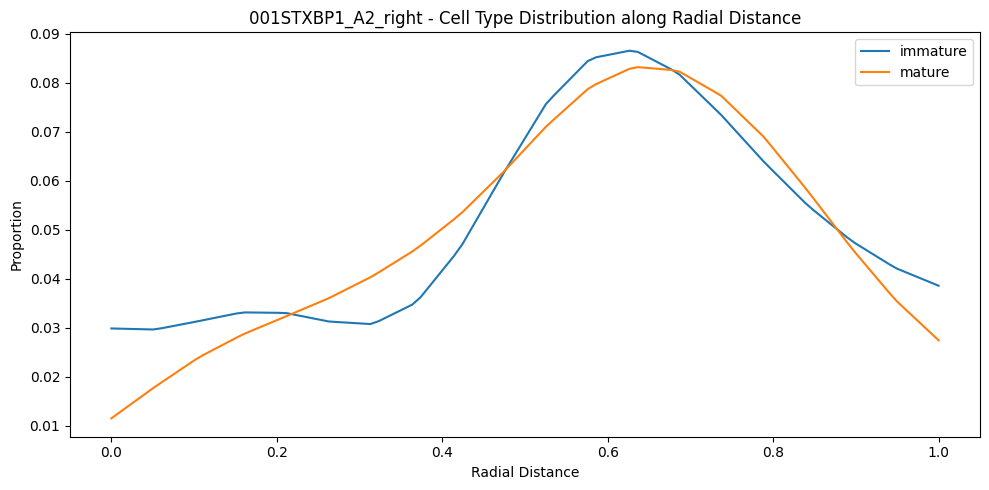

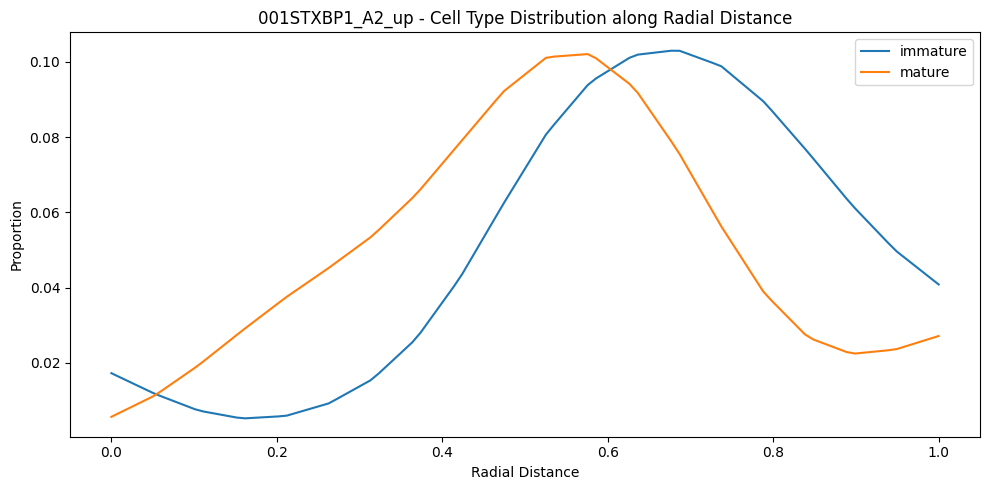

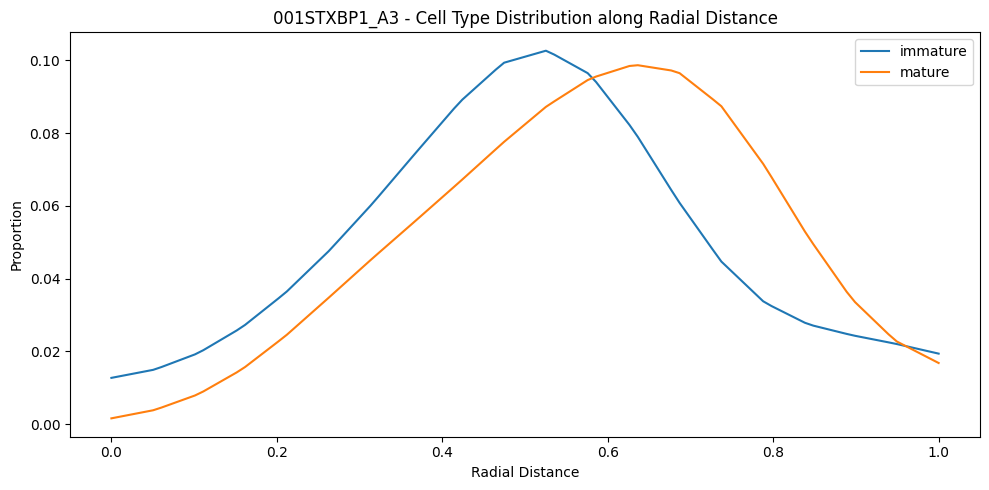

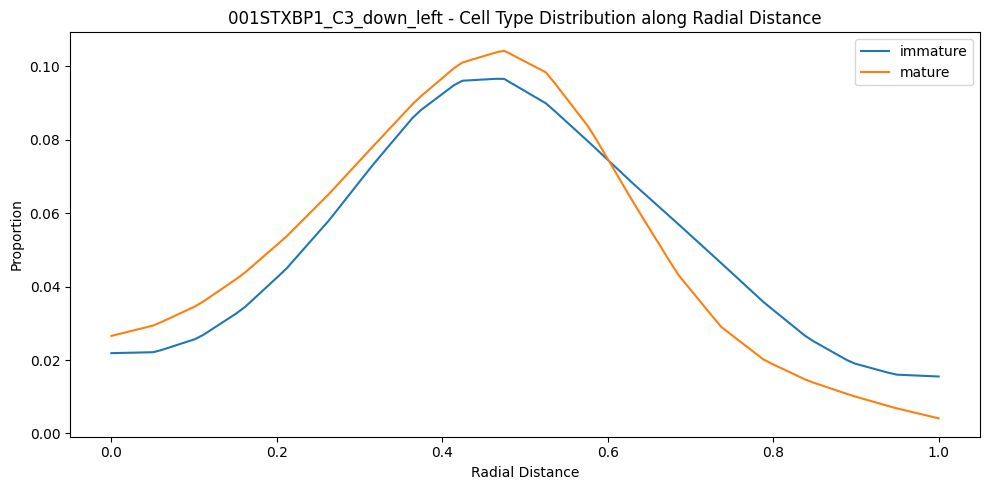

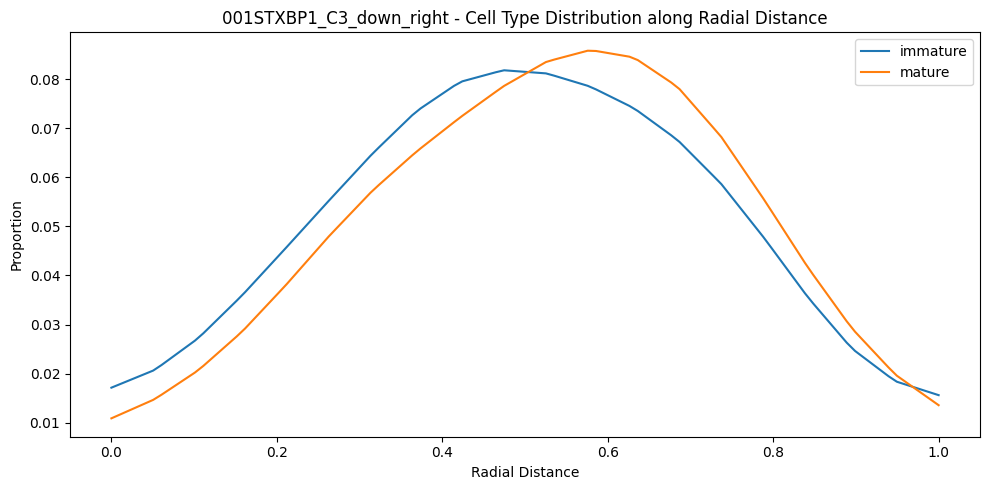

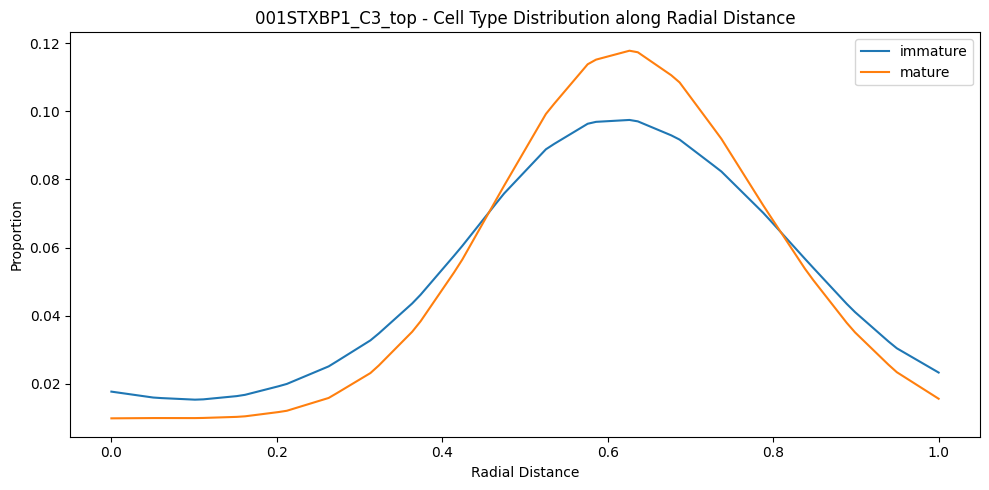

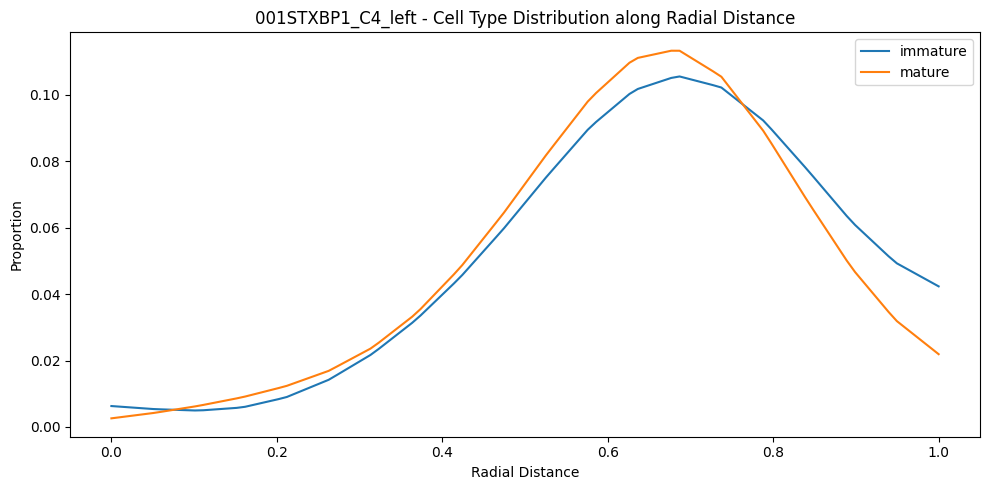

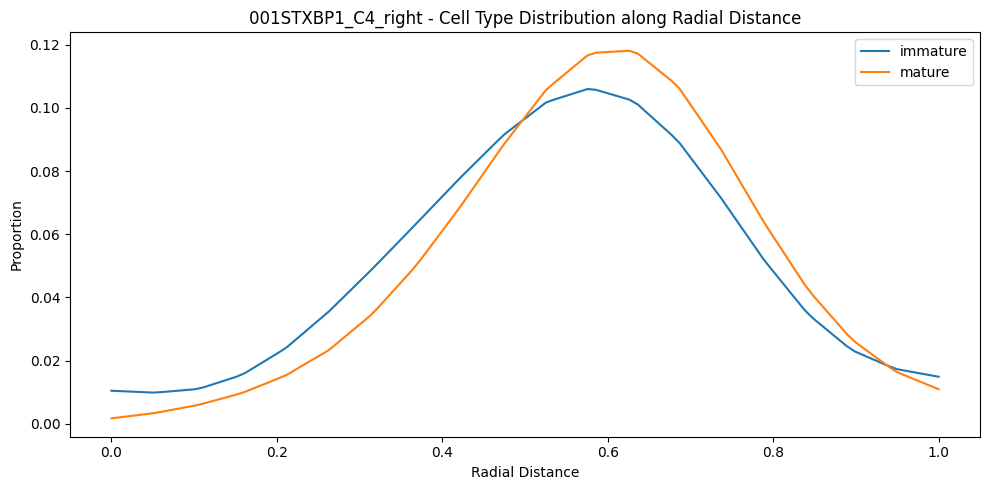

In [9]:
control_data, sick_data = project.analyze_cell_distribution_along_axis(num_bins = NUM_BINS, normalize_counts=True, normalize_axis=True, bandwidth=2, show_histogram=False, radial='spherical')

### Condition analysis - graphs

In [10]:
from scipy.special import comb
N = len(control_data) + len(sick_data)
K = len(sick_data)
print("the num of combinations: ", comb(N, K))


the num of combinations:  19448.0


ks pval: 0.8319696107963263
KS Statistic: 0.057


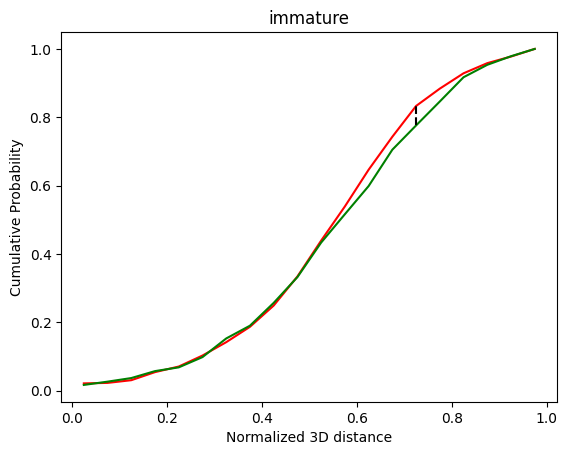

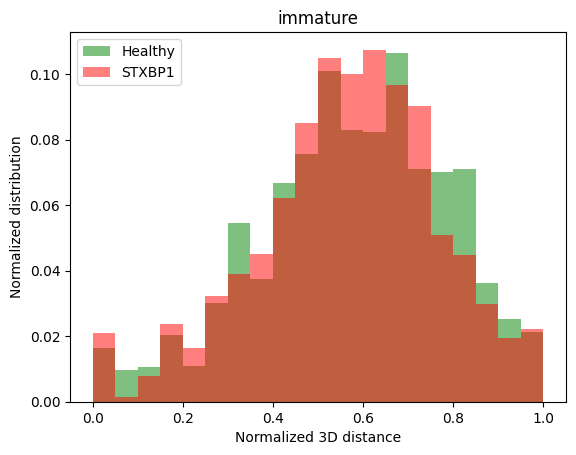

For type immature with 100 permutations, we got direct_p-value of: 6.139e-01


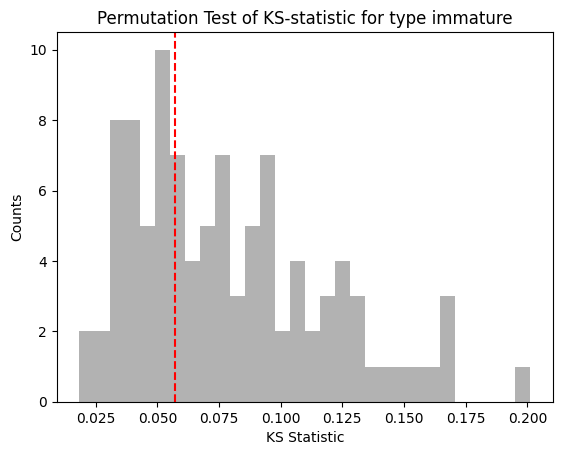

ks pval: 0.571336004933722
KS Statistic: 0.167


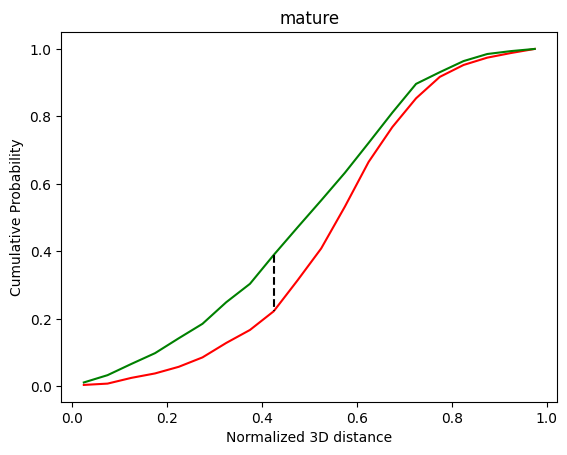

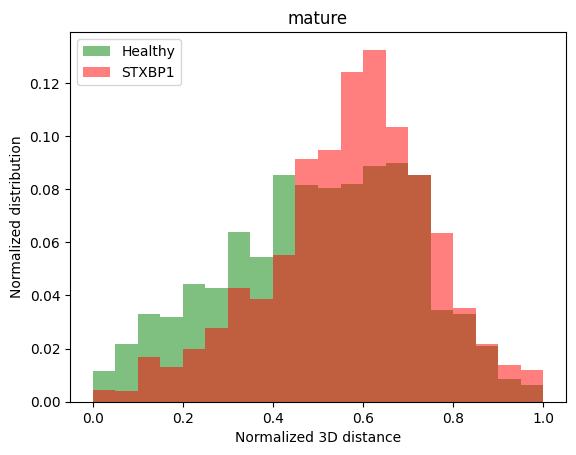

For type mature with 100 permutations, we got direct_p-value of: 6.931e-02


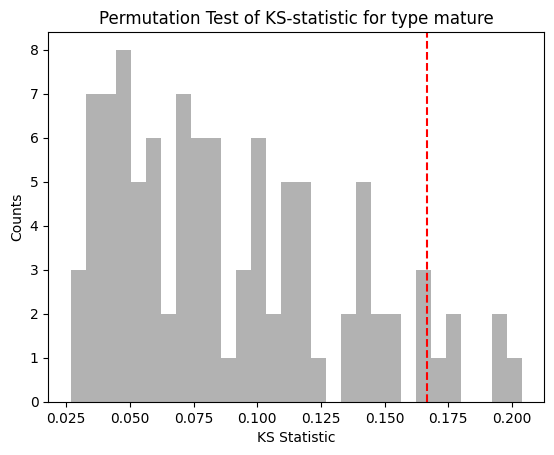

type   KS-stat  P-value (straight calc)  P-value (normal assumption)
0  immature  0.057006                 0.613861                     0.712105
1    mature  0.166806                 0.069307                     0.038585

In [11]:

results = []
for ct in ['immature', 'mature']:
    observed_stat, z_p_val, str_p_val = permutation_test(sick_data, control_data, cell_type=ct, plot_data_cdfs=True, plot_permutation_dist=True, var_name='radial distance (3D)', seed=1)
    results.append({
        "type": ct,
        "KS-stat": observed_stat,
        "P-value (straight calc)": str_p_val,
        "P-value (normal assumption)": z_p_val  
    })

res_df = pd.DataFrame(results)
res_df

## Types distribution along z axis 

### graph for each sample

C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()


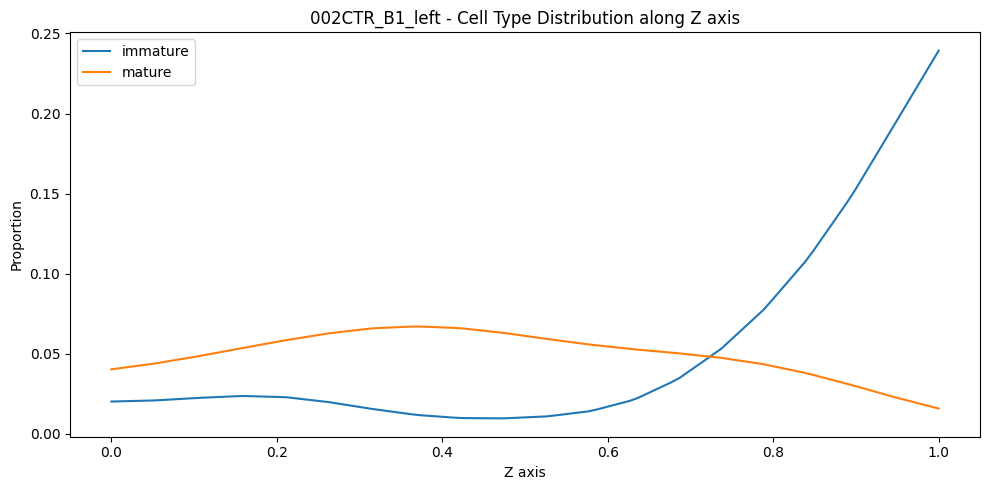

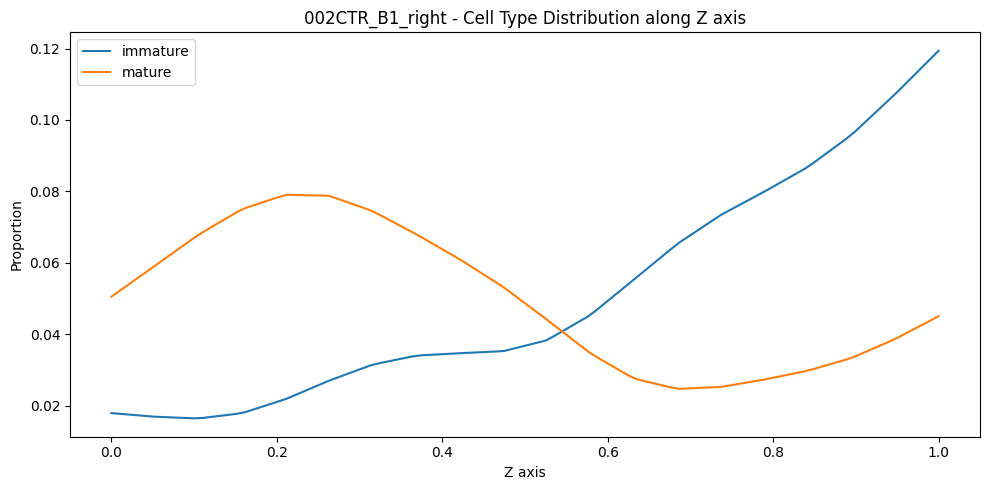

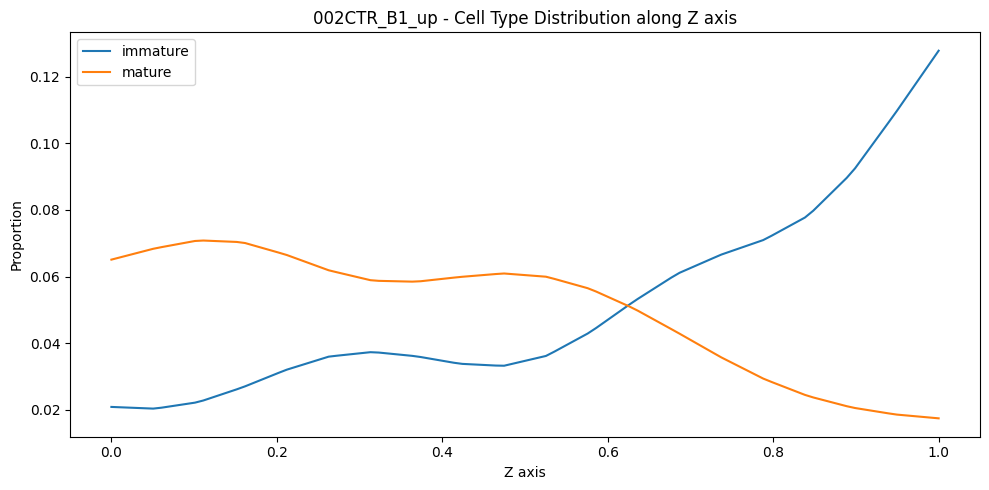

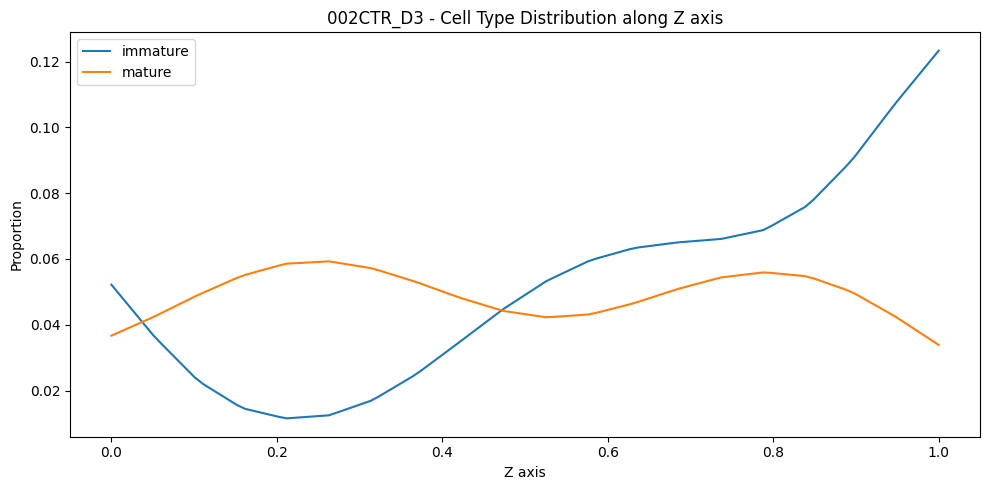

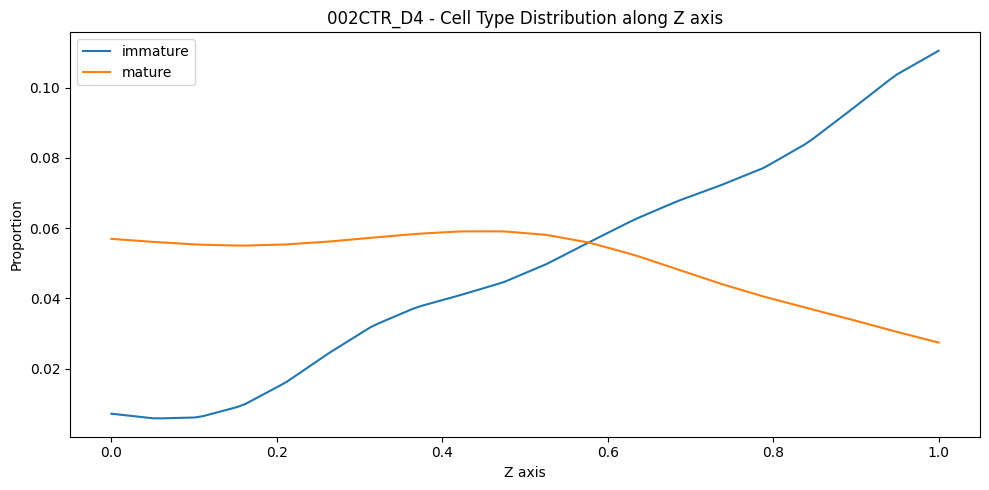

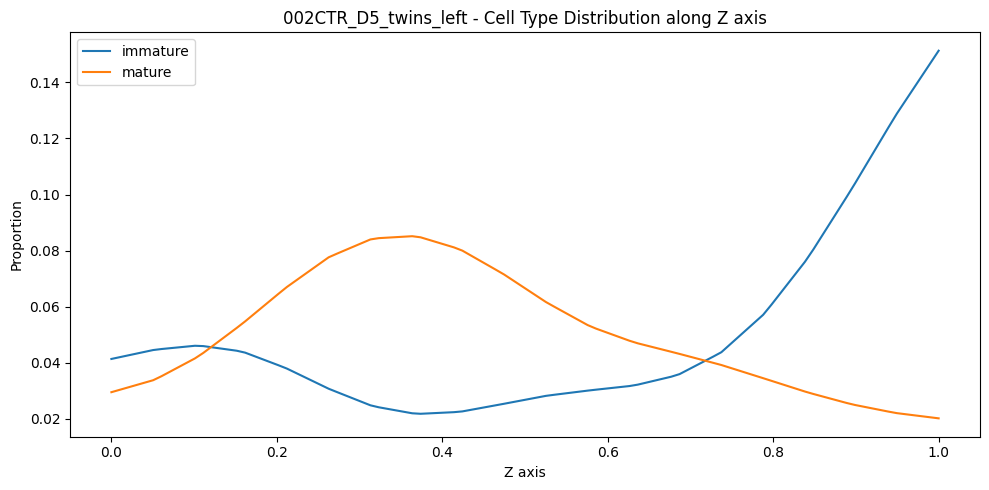

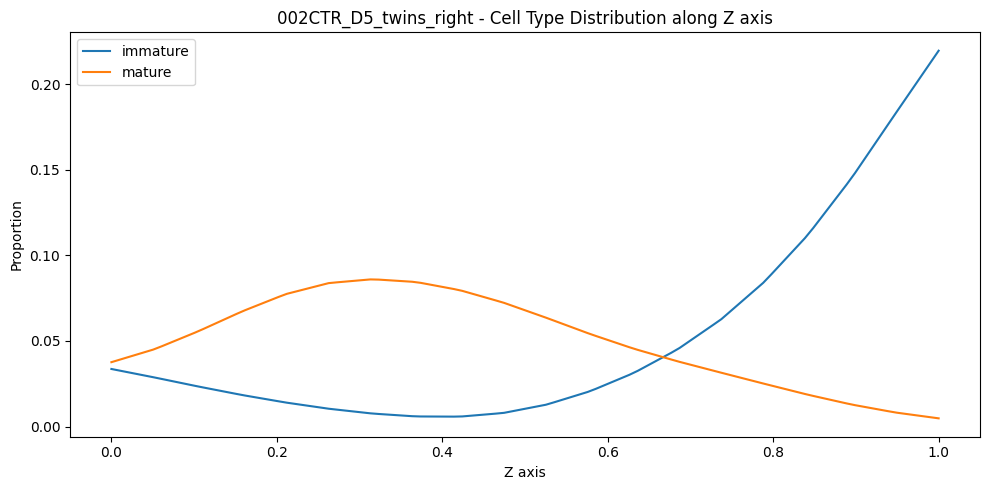

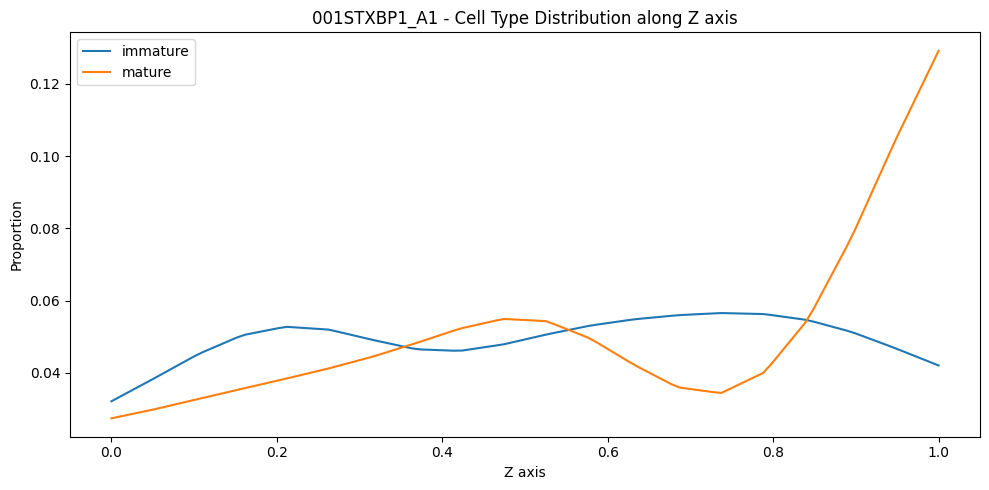

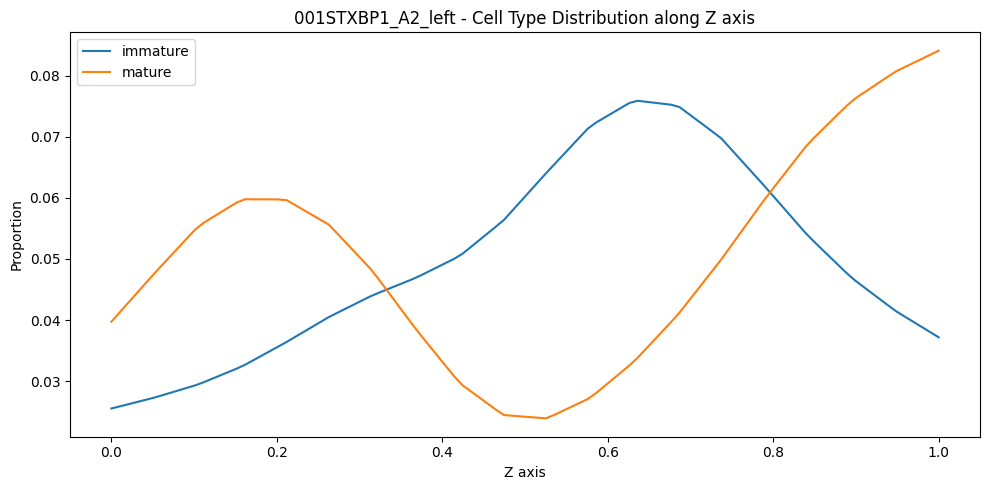

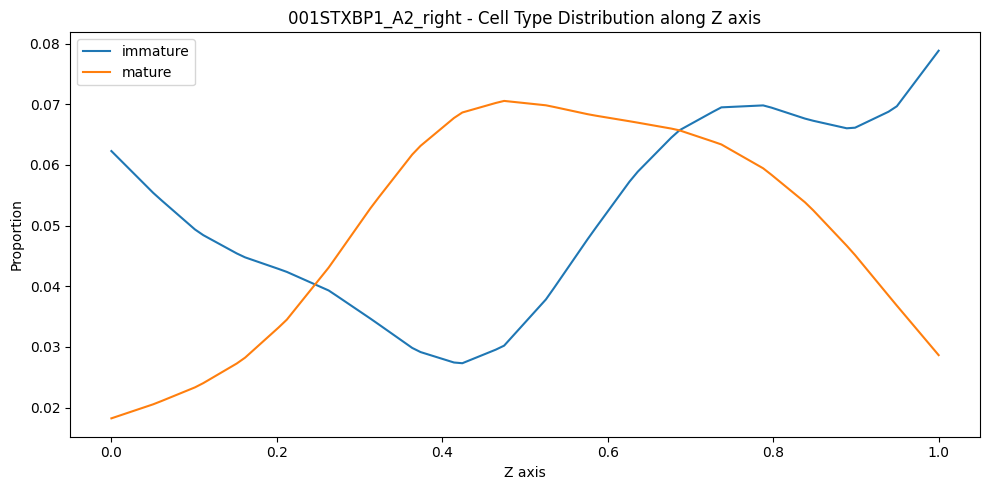

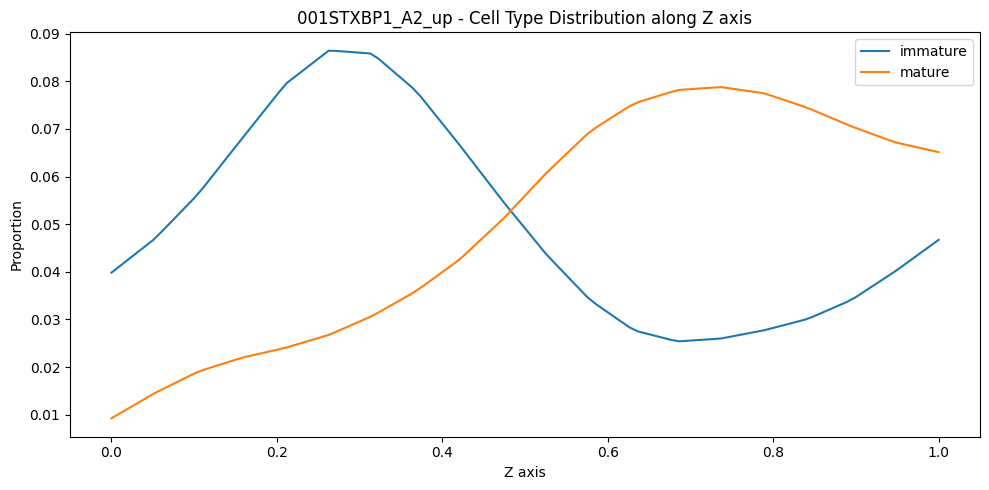

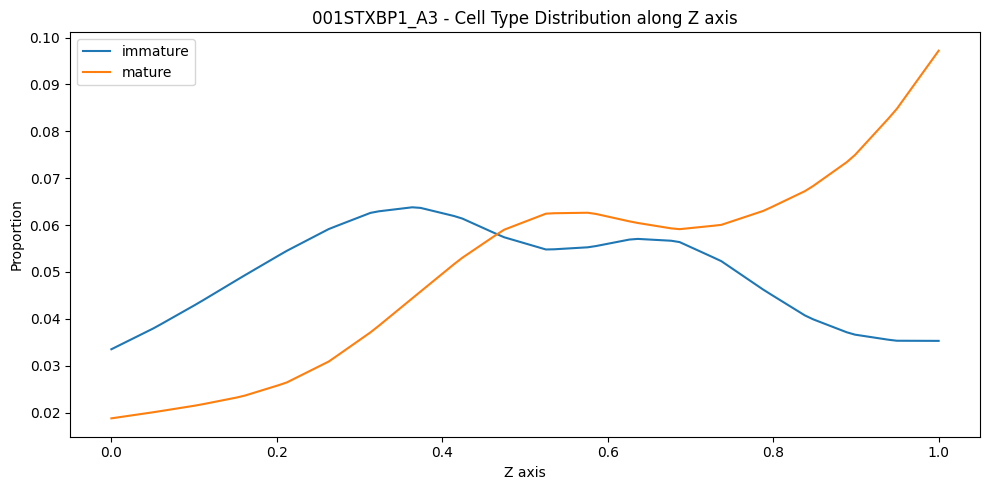

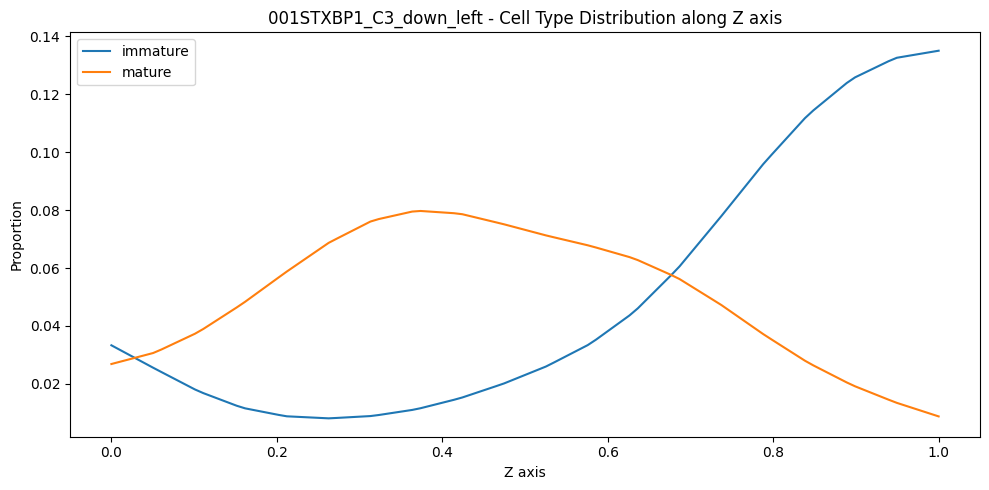

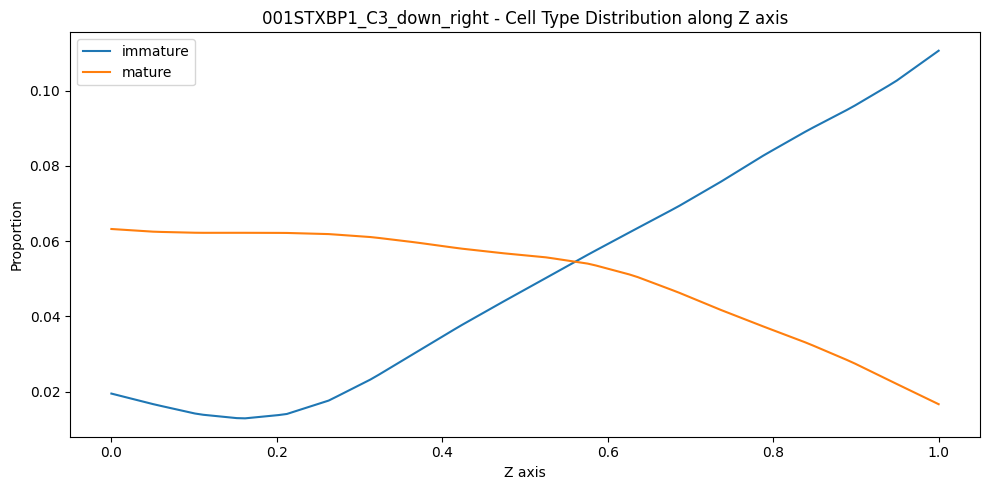

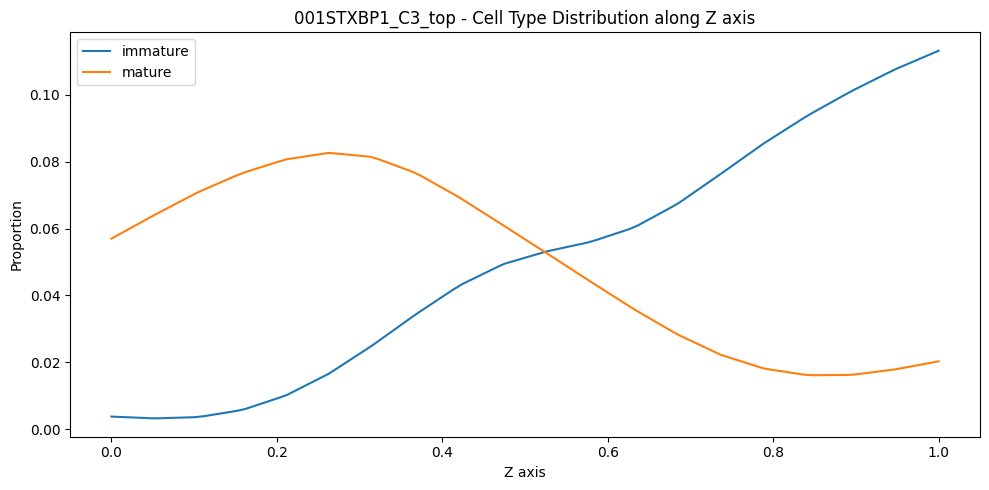

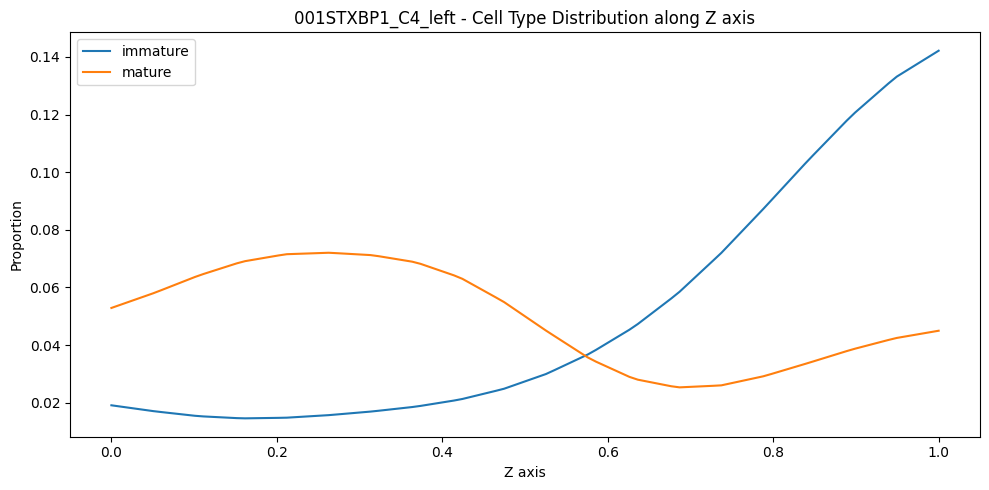

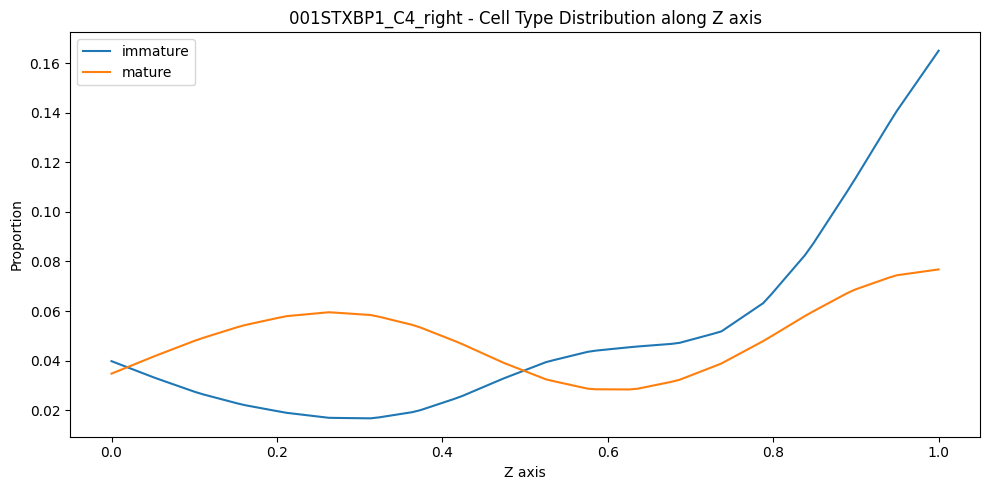

In [12]:
control_data, sick_data = project.analyze_cell_distribution_along_axis(num_bins = NUM_BINS, normalize_counts=True, normalize_axis=True, bandwidth=2, show_histogram=False)

### Condition analysis - graphs

ks pval: 0.17453300569806826
KS Statistic: 0.157


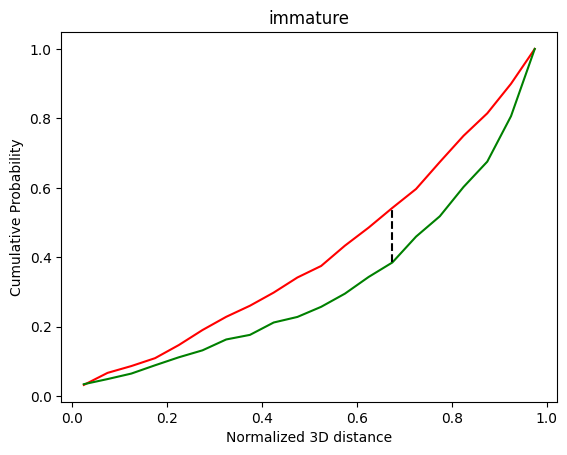

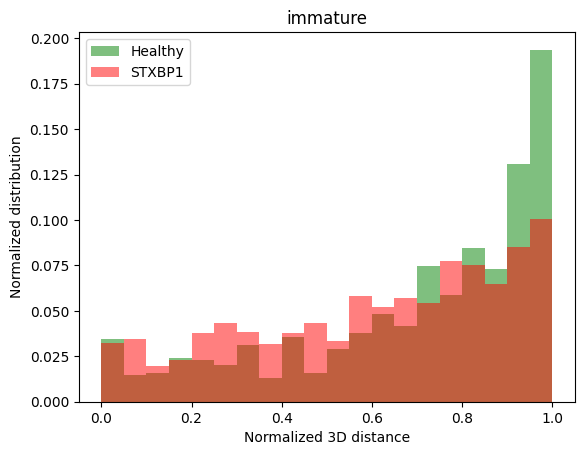

For type immature with 100 permutations, we got direct_p-value of: 1.386e-01


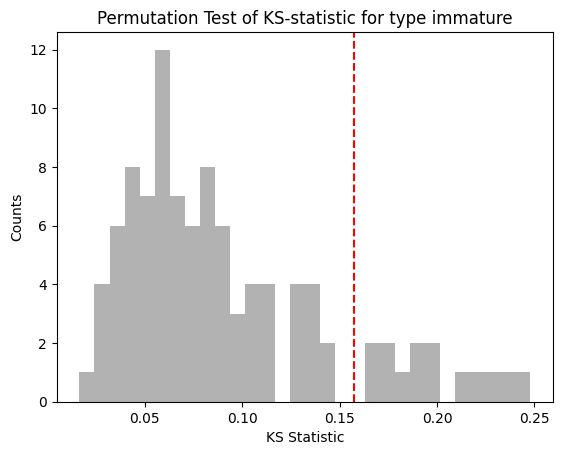

ks pval: 0.17453300569806826
KS Statistic: 0.128


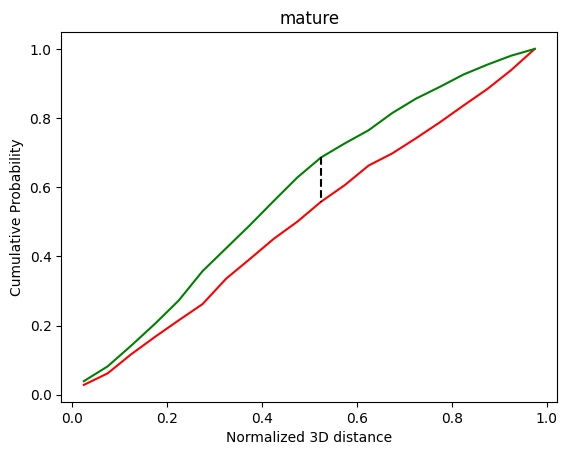

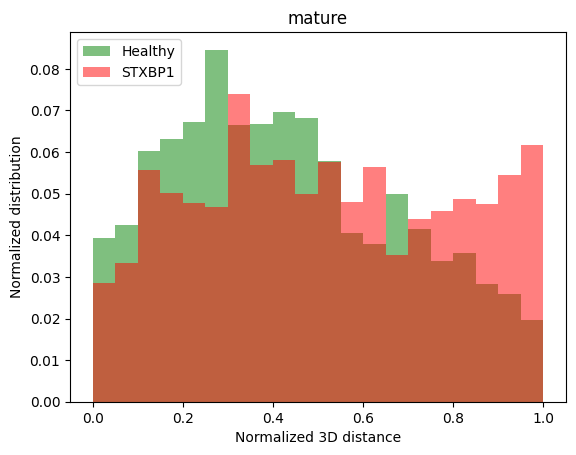

For type mature with 100 permutations, we got direct_p-value of: 1.188e-01


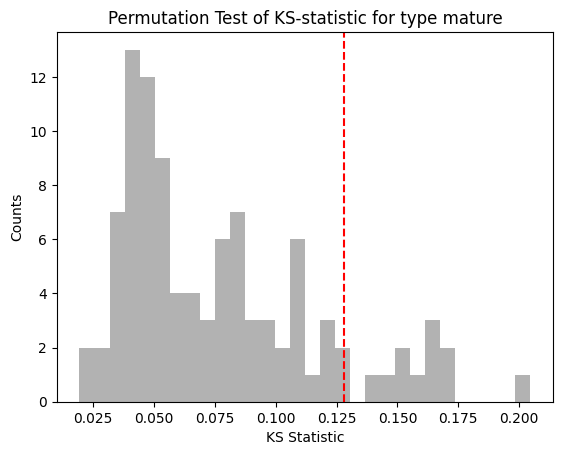

type   KS-stat  P-value (straight calc)  P-value (normal assumption)
0  immature  0.157193                 0.138614                     0.105848
1    mature  0.128077                 0.118812                     0.100493

In [13]:

results = []
for ct in ['immature', 'mature']:
    observed_stat, z_p_val, str_p_val = permutation_test(sick_data, control_data, cell_type=ct, plot_data_cdfs=True, plot_permutation_dist=True, var_name='radial distance (3D)', seed=1)
    results.append({
        "type": ct,
        "KS-stat": observed_stat,
        "P-value (straight calc)": str_p_val,
        "P-value (normal assumption)": z_p_val  
    })

res_df = pd.DataFrame(results)
res_df

## Types distribution along r axis - spherical, bin cells by volume

### graph for each sample

C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomicsLab\scripts\BuildSampleObject\project_object.py:274: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_line.show()
C:\Users\Moshe\OneDrive\coding\SpatialGenomic

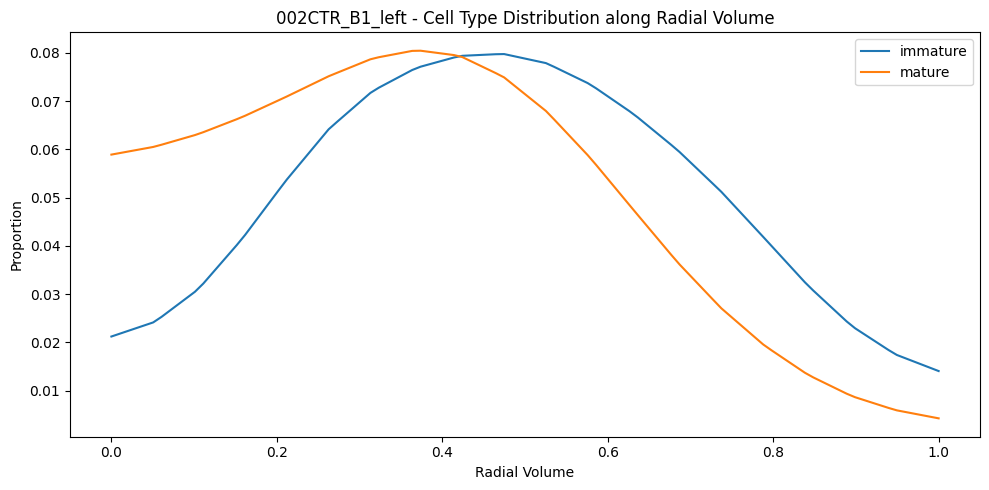

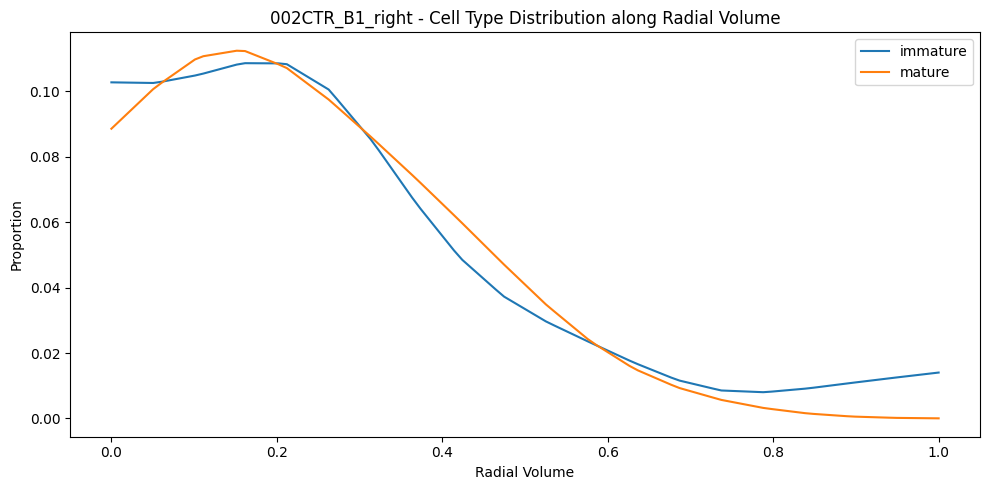

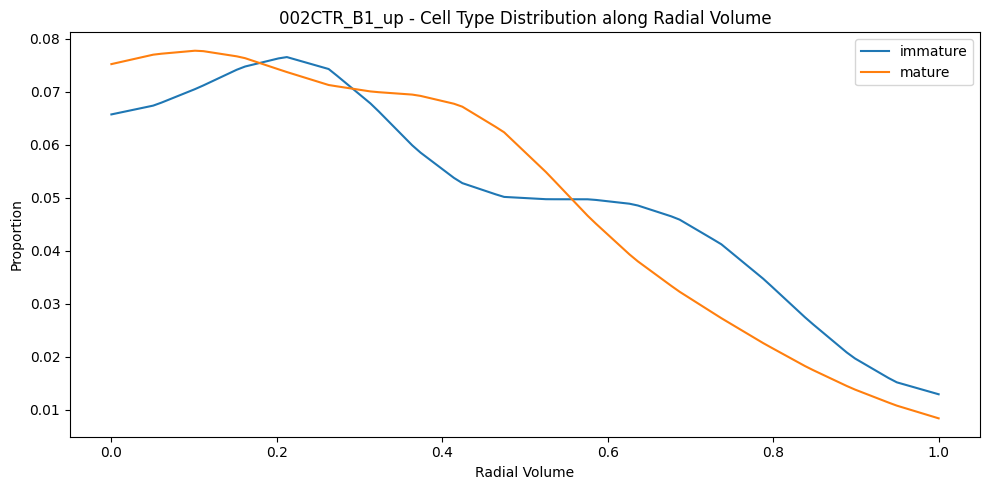

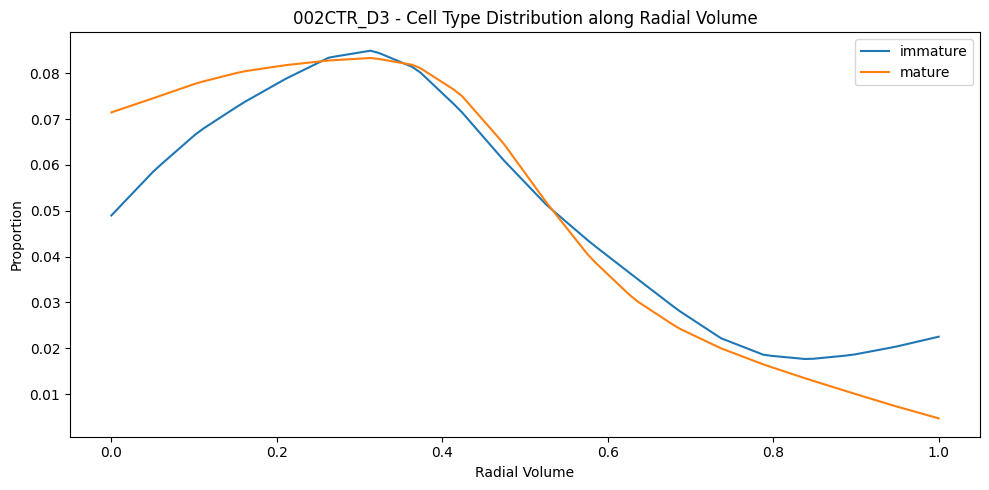

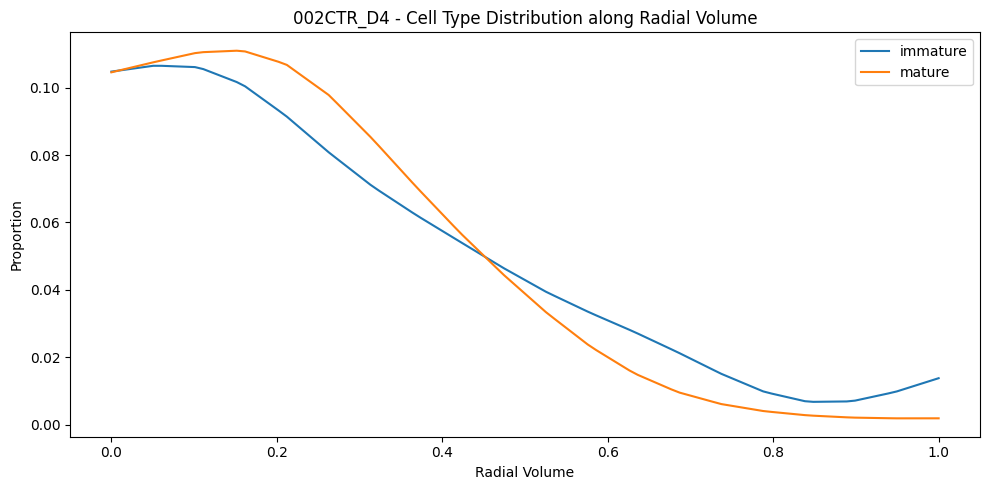

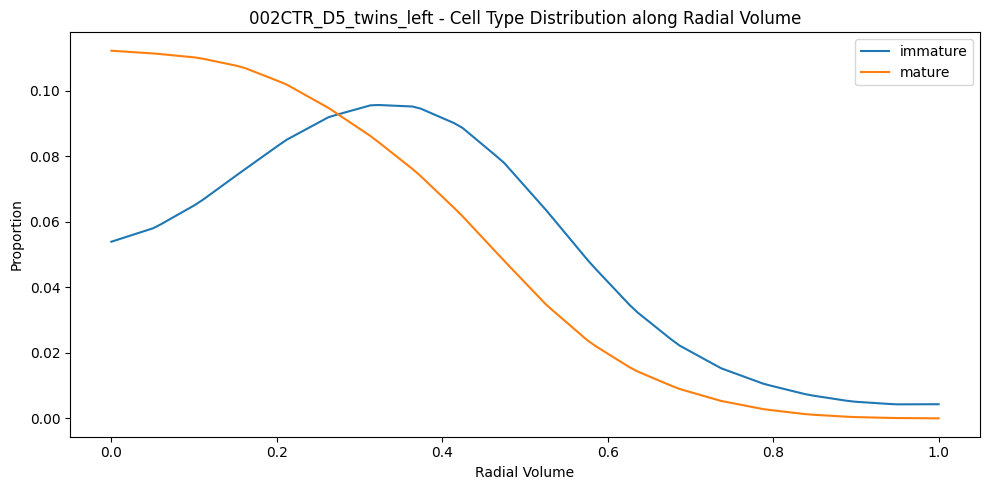

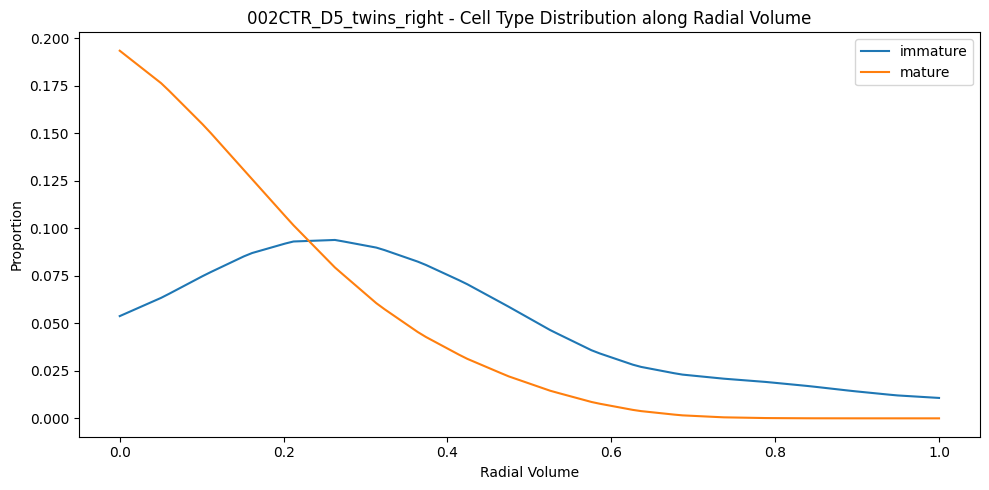

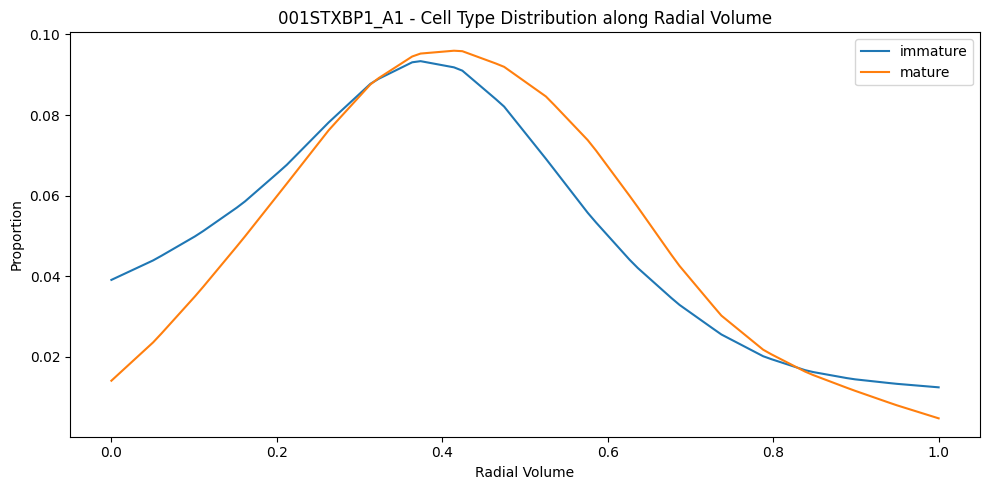

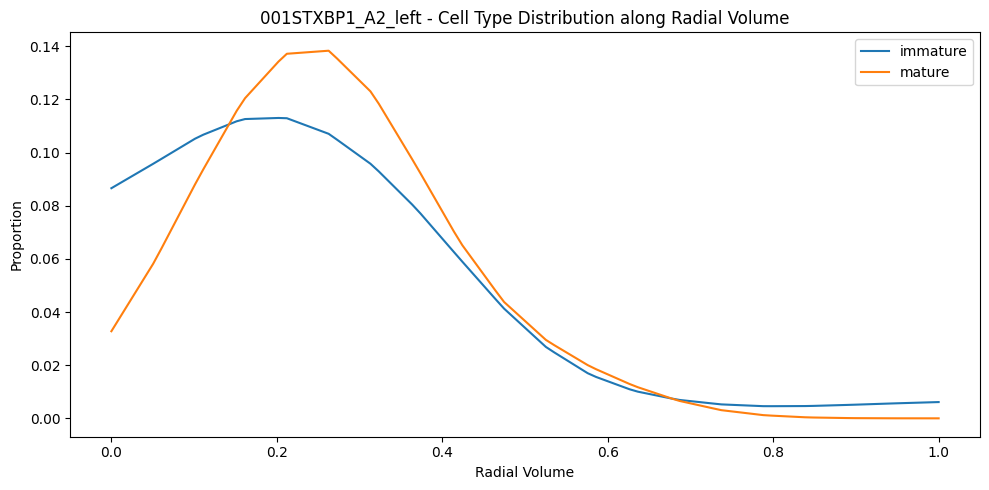

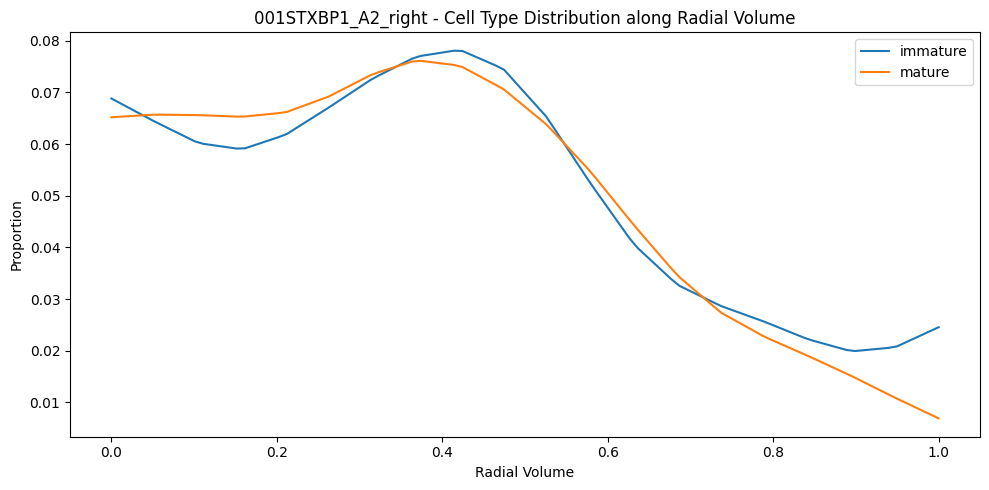

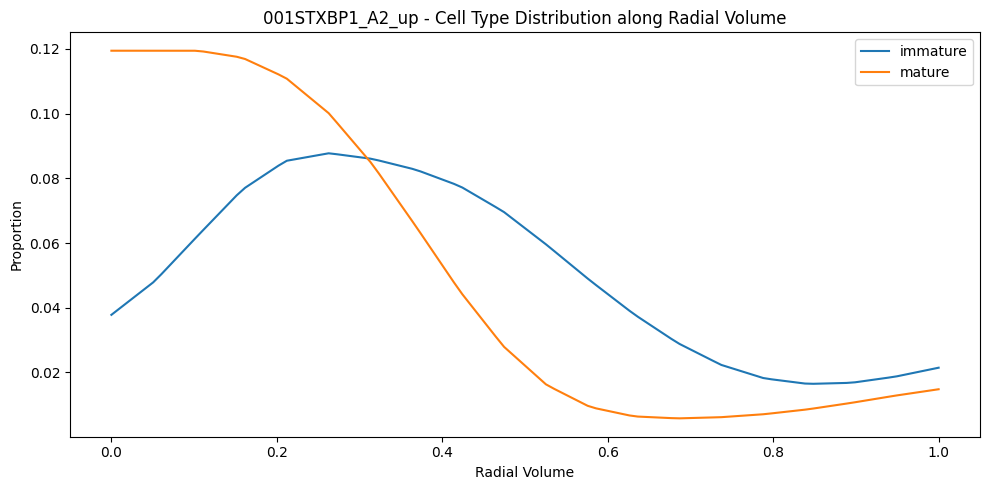

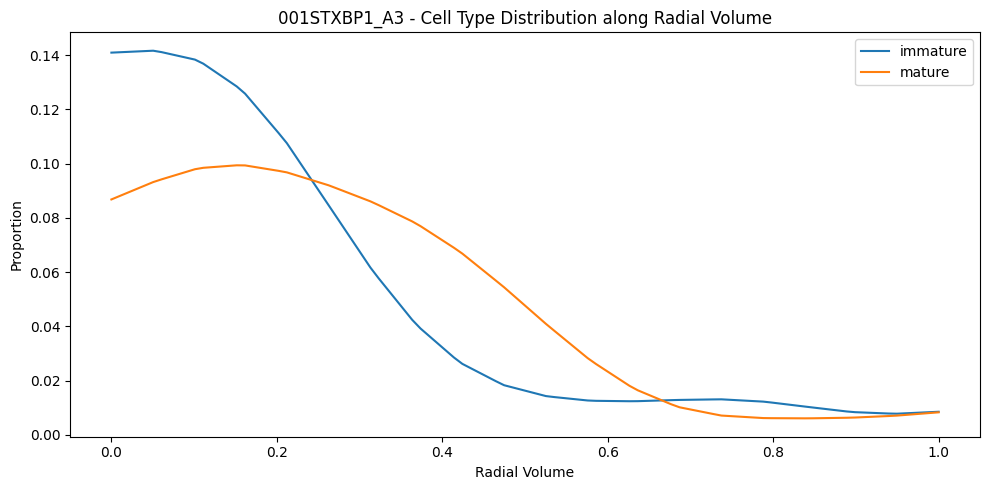

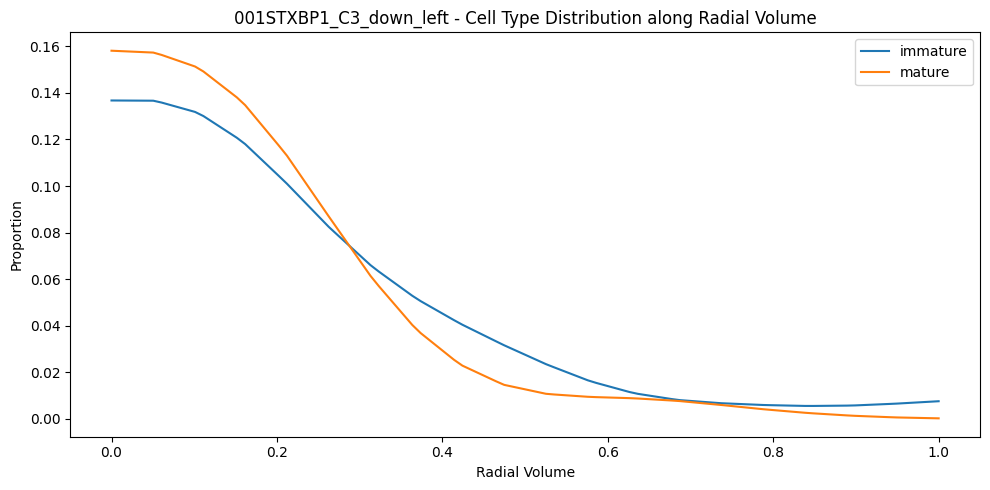

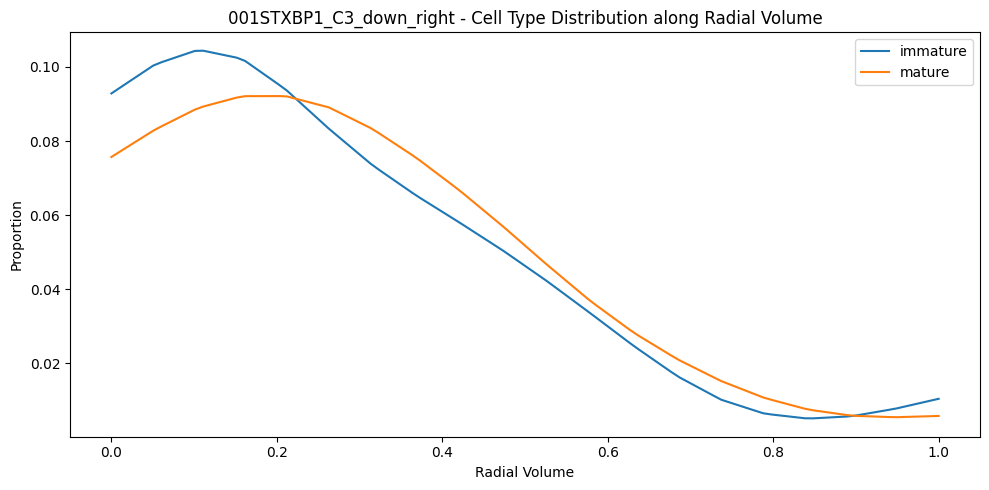

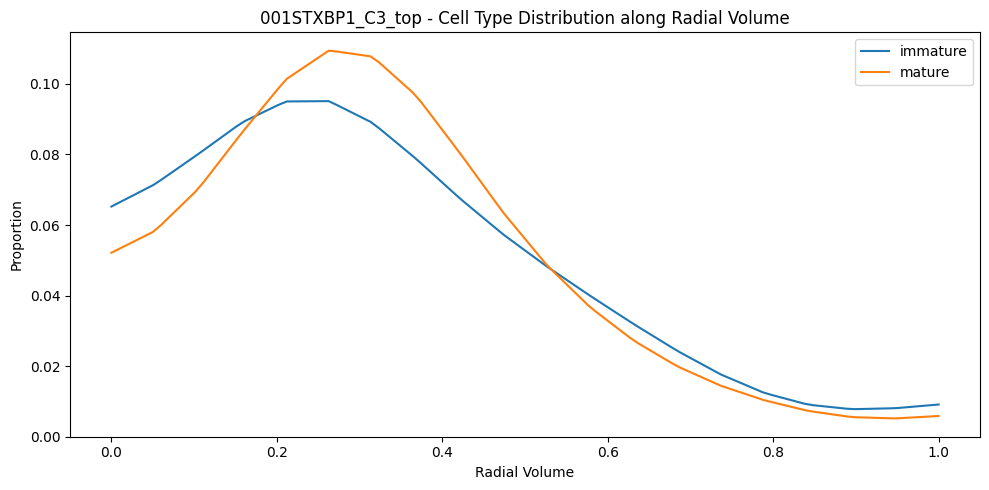

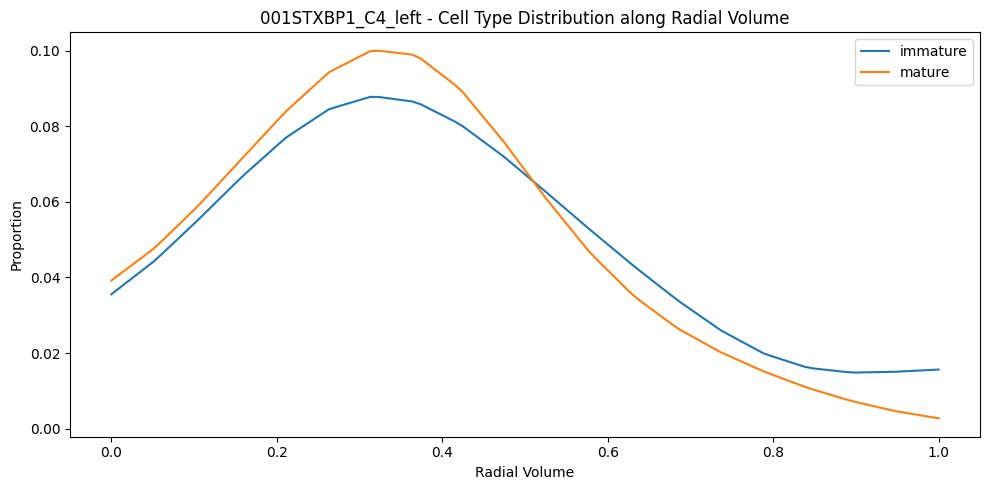

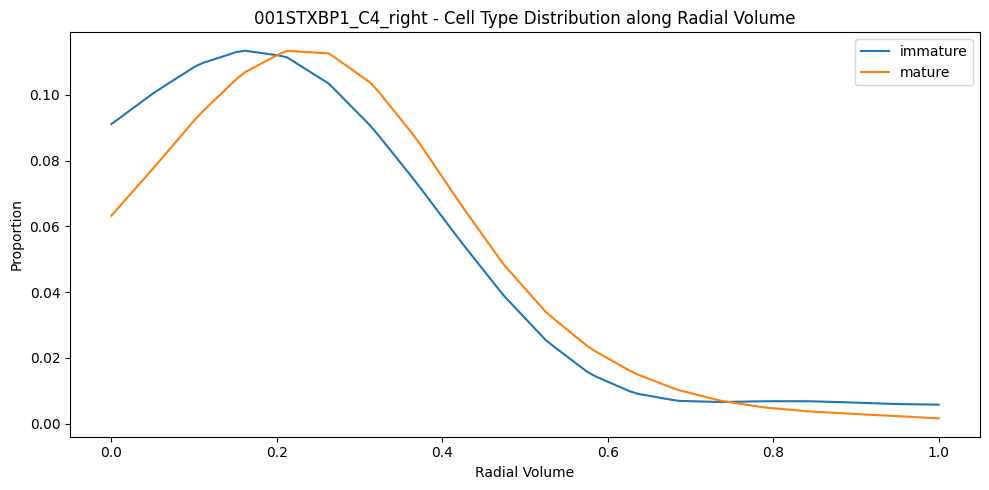

In [14]:
control_data, sick_data = project.analyze_cell_distribution_along_axis(num_bins = NUM_BINS, normalize_counts=True, normalize_axis=True, bandwidth=2, show_histogram=False, radial='spherical_volume')

### Condition analysis - graphs

ks pval: 0.8319696107963263
KS Statistic: 0.093


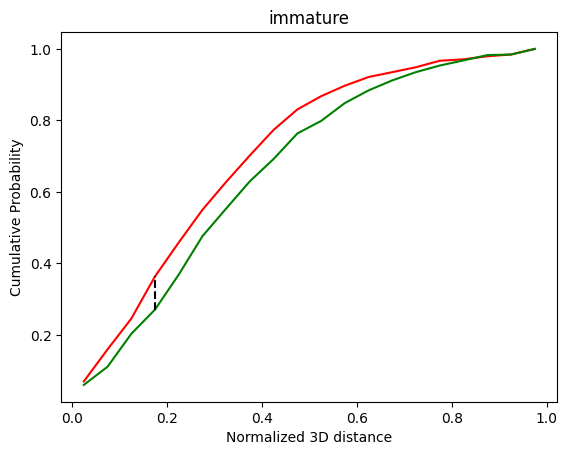

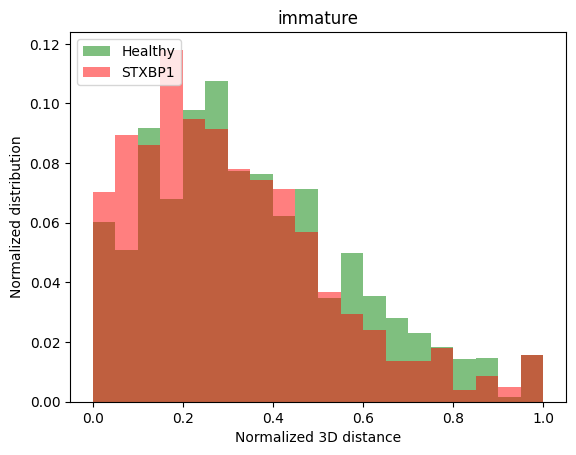

For type immature with 100 permutations, we got direct_p-value of: 4.059e-01


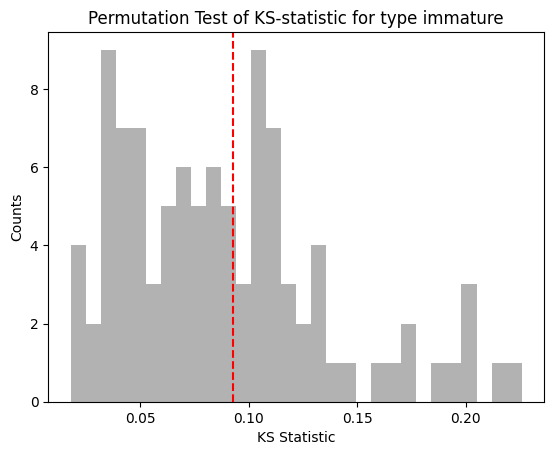

ks pval: 0.9831368772656193
KS Statistic: 0.085


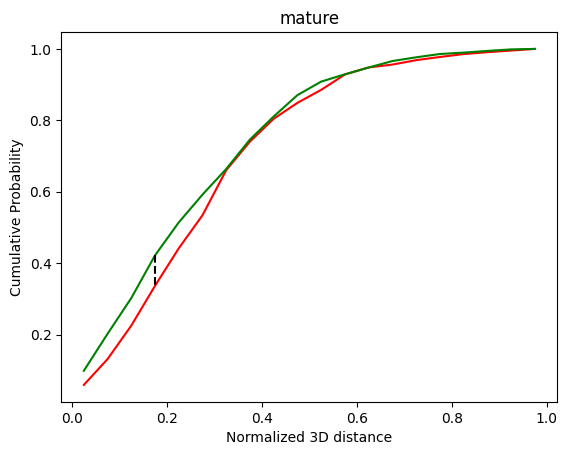

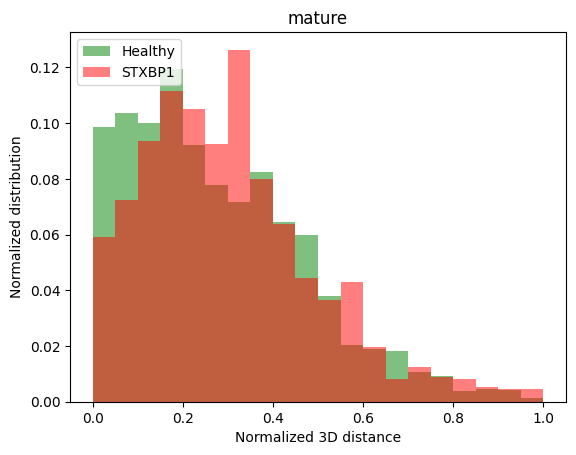

For type mature with 100 permutations, we got direct_p-value of: 3.960e-01


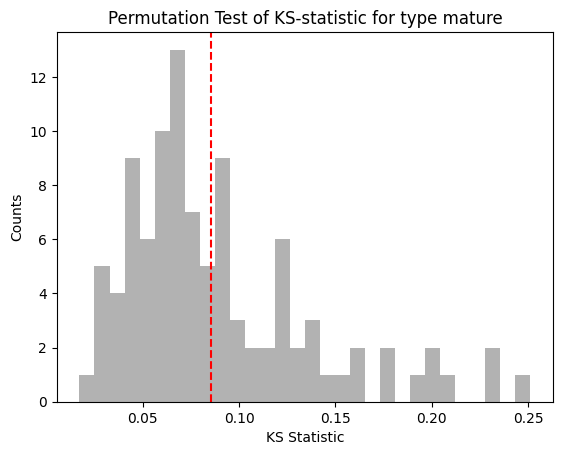

type   KS-stat  P-value (straight calc)  P-value (normal assumption)
0  immature  0.092611                 0.405941                     0.468710
1    mature  0.085293                 0.396040                     0.530392

In [15]:

results = []
for ct in ['immature', 'mature']:
    observed_stat, z_p_val, str_p_val = permutation_test(sick_data, control_data, cell_type=ct, n_permutations=100, plot_data_cdfs=True, plot_permutation_dist=True, var_name='radial distance (3D)', seed=1)
    results.append({
        "type": ct,
        "KS-stat": observed_stat,
        "P-value (straight calc)": str_p_val,
        "P-value (normal assumption)": z_p_val  
    })

res_df = pd.DataFrame(results)
res_df